In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
from astropy import units as u 
import astrospice
from astropy.time import Time
from sunpy.coordinates import frames
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient
import matplotlib.pyplot as plt
import numpy as np 

In [14]:
stix_big_flares = pd.read_csv("stix_big_flare_list_20211101_20230424_with_files.csv")

In [15]:
stix_big_flares.head()

,flare_id,duration,att_in,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,...,LC1_PEAK_COUNTS_4S,LC1_BKG_COUNTS_4S,LC2_PEAK_COUNTS_4S,LC2_BKG_COUNTS_4S,LC3_PEAK_COUNTS_4S,LC3_BKG_COUNTS_4S,LC4_PEAK_COUNTS_4S,LC4_BKG_COUNTS_4S,number_available_files,available_file_request_IDs
0,2111010137,2248,False,2021-11-01 01:37:12.050,244.711392,4235,M1.6,0.000016,NaN,NaN,...,3711,49.0,607,67.0,1087,799.0,543,463.0,3,"[2111010034, 2111010024, 2111010037]"
1,2111012338,1884,False,2021-11-01 23:38:42.784,240.740012,4256,C4.5,0.000005,NaN,NaN,...,2943,49.0,863,67.0,991,799.0,543,463.0,2,"[2111010026, 2111010028]"
2,2111020242,5904,False,2021-11-02 02:42:22.803,247.742909,4259,M1.7,0.000017,NaN,NaN,...,2175,49.0,735,67.0,927,799.0,543,463.0,3,"[2111020017, 2111020020, 2111020009]"
3,2111032112,4936,False,2021-11-03 21:12:11.065,223.000000,4281,C5.2,0.000005,NaN,NaN,...,799,49.0,167,67.0,927,799.0,495,431.0,2,"[2111030013, 2111030014]"
4,2111041050,3656,False,2021-11-04 10:50:55.146,230.723548,4291,C3.5,0.000004,NaN,NaN,...,799,45.0,115,61.0,863,799.0,495,431.0,1,[2111040016]


In [16]:
flare_peak_times = Time.strptime(stix_big_flares["peak_UTC"].values.astype(str), format_string="%Y-%m-%d %H:%M:%S.%f")

In [17]:
kernals = astrospice.registry.get_kernels("solar orbiter", "predict")

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [18]:
solo_coords = astrospice.generate_coords("SOLAR ORBITER", flare_peak_times).heliographic_stonyhurst
earth_coords = astrospice.generate_coords("earth", flare_peak_times).heliographic_stonyhurst

In [19]:
stix_big_flares["solo_lat"] = solo_coords.lat.value
stix_big_flares["solo_lon"] = solo_coords.lon.value
stix_big_flares["solo_AU_distance"] = solo_coords.radius.to(u.AU)

In [20]:
stix_big_flares.keys()

Index(['flare_id', 'duration', 'att_in', 'peak_UTC', 'LC0_BKG', '_id',
       'GOES_class', 'GOES_flux', 'CFL_X_arcsec', 'CFL_Y_arcsec', 'start_UTC',
       'end_UTC', 'LC0_PEAK_COUNTS_4S', 'LC0_BKG_COUNTS_4S',
       'LC1_PEAK_COUNTS_4S', 'LC1_BKG_COUNTS_4S', 'LC2_PEAK_COUNTS_4S',
       'LC2_BKG_COUNTS_4S', 'LC3_PEAK_COUNTS_4S', 'LC3_BKG_COUNTS_4S',
       'LC4_PEAK_COUNTS_4S', 'LC4_BKG_COUNTS_4S', 'number_available_files',
       'available_file_request_IDs', 'solo_lat', 'solo_lon',
       'solo_AU_distance'],
      dtype='object')

In [21]:
stix_big_flares.rename(columns={'LC0_PEAK_COUNTS_4S': '4-10 keV', 
                                'LC1_PEAK_COUNTS_4S': "10-15 keV",
                                'LC2_PEAK_COUNTS_4S': "15-25 keV", 
                                'LC3_PEAK_COUNTS_4S': "25-50 keV", 
                                'LC4_PEAK_COUNTS_4S': "50-84 keV"}, inplace=True)

In [22]:
stix_big_flares.head()

,flare_id,duration,att_in,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,...,LC2_BKG_COUNTS_4S,25-50 keV,LC3_BKG_COUNTS_4S,50-84 keV,LC4_BKG_COUNTS_4S,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance
0,2111010137,2248,False,2021-11-01 01:37:12.050,244.711392,4235,M1.6,0.000016,NaN,NaN,...,67.0,1087,799.0,543,463.0,3,"[2111010034, 2111010024, 2111010037]",2.111497,-1.720372,0.826700
1,2111012338,1884,False,2021-11-01 23:38:42.784,240.740012,4256,C4.5,0.000005,NaN,NaN,...,67.0,991,799.0,543,463.0,2,"[2111010026, 2111010028]",2.089242,-1.469023,0.832774
2,2111020242,5904,False,2021-11-02 02:42:22.803,247.742909,4259,M1.7,0.000017,NaN,NaN,...,67.0,927,799.0,543,463.0,3,"[2111020017, 2111020020, 2111020009]",2.086107,-1.435459,0.833616
3,2111032112,4936,False,2021-11-03 21:12:11.065,223.000000,4281,C5.2,0.000005,NaN,NaN,...,67.0,927,799.0,495,431.0,2,"[2111030013, 2111030014]",2.041583,-1.003140,0.845275
4,2111041050,3656,False,2021-11-04 10:50:55.146,230.723548,4291,C3.5,0.000004,NaN,NaN,...,61.0,863,799.0,495,431.0,1,[2111040016],2.026919,-0.877333,0.849001


In [23]:
columns = ['flare_id', 'att_in', 'GOES_flux', 'start_UTC', 'peak_UTC', 'end_UTC', '4-10 keV', '10-15 keV',
           'number_available_files', 'available_file_request_IDs', 'solo_lat', 'solo_lon',
           'solo_AU_distance']

In [24]:
stix_flares_tidy = stix_big_flares[columns]

## Lets find all flares with pixel data

In [59]:
stix_flare_w_files = stix_flares_tidy[stix_flares_tidy["number_available_files"]>=1]
stix_flare_w_files.reset_index(inplace=True, drop=True)

In [83]:
stix_flare_w_files.loc[:, "Request IDs"] = stix_flare_w_files["available_file_request_IDs"].map(lambda x: x.strip('][').split(', ')[0])

In [84]:
stix_flare_w_files

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,Request IDs
0,2111010137,False,1.557240e-05,2021-11-01T01:25:36.049,2021-11-01 01:37:12.050,2021-11-01T02:03:04.053,63487,3711,3,"[2111010034, 2111010024, 2111010037]",2.111497,-1.720372,0.826700,2111010034
1,2111012338,False,4.519747e-06,2021-11-01T23:35:18.784,2021-11-01 23:38:42.784,2021-11-02T00:06:42.787,23551,2943,2,"[2111010026, 2111010028]",2.089242,-1.469023,0.832774,2111010026
2,2111020242,False,1.718092e-05,2021-11-02T02:09:58.800,2021-11-02 02:42:22.803,2021-11-02T03:48:22.810,47103,2175,3,"[2111020017, 2111020020, 2111020009]",2.086107,-1.435459,0.833616,2111020017
3,2111032112,False,5.239915e-06,2021-11-03T21:01:03.064,2021-11-03 21:12:11.065,2021-11-03T22:23:19.070,14847,799,2,"[2111030013, 2111030014]",2.041583,-1.003140,0.845275,2111030013
4,2111041050,False,3.542749e-06,2021-11-04T10:34:19.144,2021-11-04 10:50:55.146,2021-11-04T11:35:15.151,13823,799,1,[2111040016],2.026919,-0.877333,0.849001,2111040016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2304080124,False,2.900991e-05,2023-04-08T01:18:32.006,2023-04-08 01:24:36.006,2023-04-08T01:43:08.008,15871,991,2,"[2304087134, 2304086842]",-6.427058,48.109142,0.300634,2304087134
1448,2304090559,False,9.095766e-06,2023-04-09T05:50:28.193,2023-04-09 05:59:40.194,2023-04-09T06:50:24.199,63487,4863,1,[2304099032],-5.343110,55.763570,0.296358,2304099032
1449,2304201600,True,3.389966e-06,2023-04-20T15:55:52.674,2023-04-20 16:00:52.675,2023-04-20T16:41:36.679,1507327,253951,2,"[2304201471, 2304204748]",5.912199,119.769596,0.367757,2304201471
1450,2304210330,True,9.182903e-07,2023-04-21T03:24:40.748,2023-04-21 03:30:12.749,2023-04-21T03:58:44.752,172031,10751,1,[2304216828],6.189452,121.600849,0.373680,2304216828


In [85]:
def get_pixel_data(tstart, tend, request_id):
    res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)
    res = res["stix"][res["stix"]["Request ID"] == request_id]
    f = Fido.fetch(res, path="./pixel_data/{file}")
    if len(f)>0:
        return "./"+f[0]
    else:
        return ''

def get_aux_data(tstart, tend):
    res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.aux_ephemeris)
    f = Fido.fetch(res, path="./aux_data/{file}")
    if len(f)>0:
        return "./"+f[0]
    else:
        return ''

In [88]:
stix_flare_w_files.head()

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,Request IDs
0,2111010137,False,0.000016,2021-11-01T01:25:36.049,2021-11-01 01:37:12.050,2021-11-01T02:03:04.053,63487,3711,3,"[2111010034, 2111010024, 2111010037]",2.111497,-1.720372,0.826700,2111010034
1,2111012338,False,0.000005,2021-11-01T23:35:18.784,2021-11-01 23:38:42.784,2021-11-02T00:06:42.787,23551,2943,2,"[2111010026, 2111010028]",2.089242,-1.469023,0.832774,2111010026
2,2111020242,False,0.000017,2021-11-02T02:09:58.800,2021-11-02 02:42:22.803,2021-11-02T03:48:22.810,47103,2175,3,"[2111020017, 2111020020, 2111020009]",2.086107,-1.435459,0.833616,2111020017
3,2111032112,False,0.000005,2021-11-03T21:01:03.064,2021-11-03 21:12:11.065,2021-11-03T22:23:19.070,14847,799,2,"[2111030013, 2111030014]",2.041583,-1.003140,0.845275,2111030013
4,2111041050,False,0.000004,2021-11-04T10:34:19.144,2021-11-04 10:50:55.146,2021-11-04T11:35:15.151,13823,799,1,[2111040016],2.026919,-0.877333,0.849001,2111040016


In [90]:
aux_paths = []
pixel_paths = []
for i in range(len(stix_flare_w_files)):
    row = stix_flare_w_files.iloc[i]
    tstart, tend, request_id = row["start_UTC"], row["end_UTC"], row["Request IDs"]
    pixel_paths.append(get_pixel_data(tstart, tend, request_id))
    aux_paths.append(get_aux_data(tstart, tend))
    

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211101T010036-20211101T024033_V01_2111010034-51137.fits:   0%|          | 0.00/9.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211101_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211101T233438-20211101T234526_V01_2111010026-50836.fits:   0%|          | 0.00/5.0…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211102_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211102T005806-20211102T050215_V01_2111020017-51138.fits:   0%|          | 0.00/18.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211103T204904-20211103T224459_V01_2111030013-50839.fits:   0%|          | 0.00/21.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211103_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20211104T102807-20211104T112744_V01_2111040016-50840.fits:   0%|          | 0.00/8.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211104_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211109T153918-20211109T190341_V01_2111090026-51139.fits:   0%|          | 0.00/13.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211109_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211204T231958-20211205T005425_V01_2112040041-51812.fits:   0%|          | 0.00/17.…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211204_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

solo_L2_stix-aux-ephemeris_20211205_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211205T004954-20211205T022407_V01_2112050017-51806.fits:   0%|          | 0.00/8.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211205T031547-20211205T034210_V01_2112050018-51807.fits:   0%|          | 0.00/5.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211205T065656-20211205T075808_V01_2112050021-54908.fits:   0%|          | 0.00/7.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211214T231128-20211214T234506_V01_2112140031-54913.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211215_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

solo_L2_stix-aux-ephemeris_20211214_V01.fits:   0%|          | 0.00/294k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211215T100259-20211215T103135_V01_2112150044-54216.fits:   0%|          | 0.00/936…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211215T142604-20211215T150330_V01_2112150002-53920.fits:   0%|          | 0.00/3.5…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211216T152102-20211216T153332_V01_2112160049-58637.fits:   0%|          | 0.00/5.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211216_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211217T004105-20211217T010850_V01_2112170040-54928.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211217_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211219T210457-20211219T212014_V01_2112190028-54287.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211219_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211220T111004-20211220T120324_V01_2112200056-54951.fits:   0%|          | 0.00/6.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211220_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211220T204325-20211220T205845_V01_2112200050-54323.fits:   0%|          | 0.00/639…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211221T014313-20211221T021103_V01_2112210046-54961.fits:   0%|          | 0.00/3.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211221_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211221T033800-20211221T035548_V01_2112210001-53893.fits:   0%|          | 0.00/6.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211221T055920-20211221T062125_V01_2112210047-54962.fits:   0%|          | 0.00/2.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211221T063720-20211221T074752_V01_2112210054-55075.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211221T112411-20211221T121819_V01_2112210005-53912.fits:   0%|          | 0.00/5.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211221T222535-20211221T234227_V01_2112210052-54967.fits:   0%|          | 0.00/2.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211222T001027-20211222T005509_V01_2112220020-54348.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211222_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211222T064951-20211222T080819_V01_2112220045-54970.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211222T175409-20211222T183835_V01_2112220047-54972.fits:   0%|          | 0.00/2.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211224T022553-20211224T030329_V01_2112240045-58634.fits:   0%|          | 0.00/18.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211224_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211224T030259-20211224T040544_V01_2112240041-55081.fits:   0%|          | 0.00/13.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211224T061827-20211224T065510_V01_2112240042-55082.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211224T065236-20211224T074407_V01_2112240038-54978.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211224T100111-20211224T105511_V01_2112240039-54979.fits:   0%|          | 0.00/2.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211228T034352-20211228T050503_V01_2112280046-54992.fits:   0%|          | 0.00/3.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211228_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211228T071532-20211228T083832_V01_2112280048-54994.fits:   0%|          | 0.00/3.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211228T155702-20211228T171411_V01_2112280004-53929.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211229T041741-20211229T044832_V01_2112290014-54523.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211229_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20211231T043001-20211231T093003_V01_2112310031-55594.fits:   0%|          | 0.00/11.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20211231_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20211231T193652-20211231T200958_V01_2112310002-53914.fits:   0%|          | 0.00/6.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220101T070107-20220101T082356_V01_2201020022-59226.fits:   0%|          | 0.00/901…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220101_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220112T080123-20220112T085634_V01_2201130030-59227.fits:   0%|          | 0.00/838…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220112_V01.fits:   0%|          | 0.00/334k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220113T075501-20220113T081622_V01_2201130003-55597.fits:   0%|          | 0.00/8.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220113_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220114T015126-20220114T022703_V01_2201140001-55583.fits:   0%|          | 0.00/13.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220114_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220118T164206-20220118T205210_V01_2201180023-56565.fits:   0%|          | 0.00/9.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220118_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220120T050008-20220120T100008_V01_2201200015-55923.fits:   0%|          | 0.00/14.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220120_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220125T101903-20220125T105152_V01_2201250023-56530.fits:   0%|          | 0.00/484…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220125_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220125T233812-20220126T000850_V01_2201250042-56594.fits:   0%|          | 0.00/6.8…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220126_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220126T072147-20220126T075824_V01_2201263253-60751.fits:   0%|          | 0.00/567…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220128T012923-20220128T014441_V01_2201280039-56623.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220128_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220128T083115-20220128T090039_V01_2201280048-56632.fits:   0%|          | 0.00/4.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220128T183543-20220128T194943_V01_2201280056-56641.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220129T004028-20220129T005909_V01_2201290057-57036.fits:   0%|          | 0.00/13.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220129_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220129T041113-20220129T042614_V01_2201290023-56650.fits:   0%|          | 0.00/3.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220129T113401-20220129T120320_V01_2201290036-56663.fits:   0%|          | 0.00/4.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220129T164144-20220129T172234_V01_2201296043-60753.fits:   0%|          | 0.00/472…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220129T172749-20220129T173920_V01_2201290049-56676.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220129T213801-20220130T014434_V01_2201290055-56682.fits:   0%|          | 0.00/28.…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220130_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220130T071111-20220130T072816_V01_2201300017-56693.fits:   0%|          | 0.00/3.5…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220201T030903-20220201T033406_V01_2202010032-58300.fits:   0%|          | 0.00/9.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220201_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220201T070705-20220201T072413_V01_2202010038-58306.fits:   0%|          | 0.00/4.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220201T150512-20220201T154547_V01_2202010048-58316.fits:   0%|          | 0.00/11.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220201T220800-20220201T235325_V01_2202016097-60755.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220202T092624-20220202T110113_V01_2202030055-59219.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220202_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220204T153202-20220204T173742_V01_2202040043-58435.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220204_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220204T220954-20220204T221705_V01_2202040049-58441.fits:   0%|          | 0.00/3.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220208T212833-20220208T222055_V01_2202080013-58504.fits:   0%|          | 0.00/16.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220208_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220209T172320-20220209T180906_V01_2202090019-58515.fits:   0%|          | 0.00/22.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220209_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220210T015705-20220210T022210_V01_2202100024-58594.fits:   0%|          | 0.00/7.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220210_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220210T042038-20220210T045812_V01_2202100025-58595.fits:   0%|          | 0.00/9.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220212T082023-20220212T094849_V01_2202120014-58612.fits:   0%|          | 0.00/33.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220212_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220213T013646-20220213T025204_V01_2202130026-58617.fits:   0%|          | 0.00/24.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220213_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220213T211357-20220213T224343_V01_2202130003-58096.fits:   0%|          | 0.00/15.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220214T164724-20220214T183101_V01_2202140031-59220.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220214_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220215T050632-20220215T053015_V01_2202150008-59231.fits:   0%|          | 0.00/5.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220215_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220215T171055-20220215T195235_V01_2202155513-60700.fits:   0%|          | 0.00/14.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220218T022334-20220218T033034_V01_2202180001-59221.fits:   0%|          | 0.00/798…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220218_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220220T032156-20220220T042022_V01_2202203729-62385.fits:   0%|          | 0.00/6.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220220_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220221T183504-20220221T192653_V01_2202210520-62986.fits:   0%|          | 0.00/5.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220221_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220225T211841-20220225T214013_V01_2202250820-63039.fits:   0%|          | 0.00/8.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220225_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220301T192726-20220301T194434_V01_2203018978-63044.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220301_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220302T040334-20220302T041820_V01_2203020054-63048.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220302_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220302T165707-20220302T170726_V01_2203020151-62190.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220302T172256-20220302T174017_V01_2203026385-60566.fits:   0%|          | 0.00/82.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220302T192454-20220302T193639_V01_2203022156-63061.fits:   0%|          | 0.00/2.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220303T203605-20220303T221520_V01_2203036601-63079.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220303_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220306T021313-20220306T025302_V01_2203066108-63136.fits:   0%|          | 0.00/4.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220306_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220308T024720-20220308T032221_V01_2203083190-61089.fits:   0%|          | 0.00/3.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220308_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220311T083406-20220311T091632_V01_2203110273-65275.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220311_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220311T110250-20220311T113415_V01_2203116295-65280.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220311T125159-20220311T133520_V01_2203113085-65284.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220311T215307-20220311T233014_V01_2203112605-61074.fits:   0%|          | 0.00/10.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220312T051239-20220312T051700_V01_2203122746-62627.fits:   0%|          | 0.00/74.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220312_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220313T030026-20220313T034219_V01_2203131151-61075.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220313_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220313T231309-20220314T000505_V01_2203138782-62193.fits:   0%|          | 0.00/8.9…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220314_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220314T021852-20220314T023947_V01_2203145417-65327.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220314T082305-20220314T092803_V01_2203148031-62194.fits:   0%|          | 0.00/7.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220314T162537-20220314T165636_V01_2203149730-65341.fits:   0%|          | 0.00/812…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220314T165656-20220314T183907_V01_2203141354-62196.fits:   0%|          | 0.00/3.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220314T212752-20220314T224925_V01_2203141350-62197.fits:   0%|          | 0.00/3.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220315T050934-20220315T064525_V01_2203150378-62198.fits:   0%|          | 0.00/10.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220315_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220315T075806-20220315T082026_V01_2203157294-62199.fits:   0%|          | 0.00/2.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220315T111822-20220315T113831_V01_2203157663-65347.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220315T122457-20220315T135111_V01_2203159015-62200.fits:   0%|          | 0.00/9.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220315T223255-20220315T231455_V01_2203159363-62212.fits:   0%|          | 0.00/14.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220319T205334-20220319T211929_V01_2203194865-50128.fits:   0%|          | 0.00/1.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220319_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220320T072559-20220320T080441_V01_2203203893-50129.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220320_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220321T043005-20220321T093014_V01_2203210506-62961.fits:   0%|          | 0.00/10.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220321_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220322T012012-20220322T013540_V01_2203227606-62971.fits:   0%|          | 0.00/25.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220322_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220324T122439-20220324T124156_V01_2203246463-50154.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220324_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220324T181319-20220324T190000_V01_2203249461-50156.fits:   0%|          | 0.00/3.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220325T041727-20220325T102004_V01_2203251410-63151.fits:   0%|          | 0.00/61.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220325_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220328T093747-20220328T094306_V01_2203286708-49934.fits:   0%|          | 0.00/438…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220328_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220328T105107-20220328T125640_V01_2203287965-49218.fits:   0%|          | 0.00/17.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220328T164955-20220328T174317_V01_2203282347-51236.fits:   0%|          | 0.00/5.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220328T183855-20220328T204352_V01_2203283521-51234.fits:   0%|          | 0.00/9.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220328T204326-20220328T211353_V01_2203283362-51233.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220328T211504-20220328T211837_V01_2203282688-51232.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220328T214106-20220328T215523_V01_2203288066-51230.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220328T221753-20220328T223211_V01_2203287319-51229.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220328T223520-20220328T235830_V01_2203284601-51227.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T001932-20220329T005404_V01_2203291249-50110.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220329_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T005044-20220329T013659_V01_2203294410-51225.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T013717-20220329T022024_V01_2203292056-51223.fits:   0%|          | 0.00/3.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T024954-20220329T032013_V01_2203296462-51222.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T031907-20220329T035045_V01_2203299054-50179.fits:   0%|          | 0.00/4.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T050403-20220329T055052_V01_2203295349-50240.fits:   0%|          | 0.00/976…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T061347-20220329T062458_V01_2203294195-51221.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T072903-20220329T074950_V01_2203292307-49221.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T074950-20220329T091022_V01_2203297140-51218.fits:   0%|          | 0.00/6.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T091020-20220329T094642_V01_2203299514-51217.fits:   0%|          | 0.00/5.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T094641-20220329T111741_V01_2203295727-51216.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T134546-20220329T143909_V01_2203296267-51213.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T164136-20220329T164631_V01_2203298827-50028.fits:   0%|          | 0.00/680…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T165113-20220329T172405_V01_2203297849-51169.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T172755-20220329T175042_V01_2203296846-49219.fits:   0%|          | 0.00/5.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T191917-20220329T194300_V01_2203291942-51171.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T202007-20220329T203407_V01_2203299335-51172.fits:   0%|          | 0.00/5.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T213747-20220329T215048_V01_2203293826-51173.fits:   0%|          | 0.00/16.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220329T220753-20220329T221543_V01_2203290047-51174.fits:   0%|          | 0.00/3.6…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220330T021304-20220330T022839_V01_2203303712-51178.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220330_V01.fits:   0%|          | 0.00/403k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220330T033003-20220330T045211_V01_2203303615-51211.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220330T045250-20220330T050232_V01_2203302147-49248.fits:   0%|          | 0.00/3.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220330T053335-20220330T054405_V01_2203300985-50092.fits:   0%|          | 0.00/864…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220330T054334-20220330T080656_V01_2203300718-51210.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220330T100459-20220330T101617_V01_2203302169-50085.fits:   0%|          | 0.00/864…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220330T111436-20220330T112247_V01_2203305022-49220.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220330T115837-20220330T121339_V01_2203308212-51202.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220330T132712-20220330T142707_V01_2203307108-49185.fits:   0%|          | 0.00/121…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220330T153232-20220330T160330_V01_2203309218-50422.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220330T170846-20220330T184541_V01_2203306666-49334.fits:   0%|          | 0.00/42.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T021959-20220331T023537_V01_2203315512-51190.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220331_V01.fits:   0%|          | 0.00/403k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T052309-20220331T053220_V01_2203318671-50074.fits:   0%|          | 0.00/452…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T054814-20220331T055637_V01_2203315749-51182.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T071315-20220331T072142_V01_2203313252-51184.fits:   0%|          | 0.00/1.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T084837-20220331T092307_V01_2203312589-51187.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T111900-20220331T123010_V01_2203317755-51189.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T163417-20220331T164441_V01_2203313826-50069.fits:   0%|          | 0.00/838…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T170937-20220331T171438_V01_2203310842-50072.fits:   0%|          | 0.00/642…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T180714-20220331T191742_V01_2203315831-49317.fits:   0%|          | 0.00/30.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T194739-20220331T211918_V01_2203319774-50167.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220331T232810-20220401T000124_V01_2203319696-50169.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220401T032934-20220401T033238_V01_2204015215-50235.fits:   0%|          | 0.00/72.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220401_V01.fits:   0%|          | 0.00/412k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220401T112522-20220401T115436_V01_2204018504-51167.fits:   0%|          | 0.00/3.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220401T181105-20220401T183028_V01_2204012489-50434.fits:   0%|          | 0.00/351…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220401T224747-20220401T225416_V01_2204010613-50437.fits:   0%|          | 0.00/337…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220402T003838-20220402T005547_V01_2204022678-50447.fits:   0%|          | 0.00/423…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220402_V01.fits:   0%|          | 0.00/412k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220402T021618-20220402T023440_V01_2204022265-50442.fits:   0%|          | 0.00/444…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220402T080220-20220402T084905_V01_2204022674-52014.fits:   0%|          | 0.00/6.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220402T125129-20220402T135644_V01_2204020888-49335.fits:   0%|          | 0.00/18.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220402T134955-20220402T172446_V01_2204027008-49338.fits:   0%|          | 0.00/10.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220402T173017-20220402T175631_V01_2204026476-52648.fits:   0%|          | 0.00/723…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220402T200432-20220402T203312_V01_2204020477-52016.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220403T033049-20220403T034040_V01_2204036760-50459.fits:   0%|          | 0.00/452…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220403_V01.fits:   0%|          | 0.00/412k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220403T123119-20220403T135420_V01_2204036062-64549.fits:   0%|          | 0.00/14.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220403T143742-20220403T151408_V01_2204035716-52235.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220403T162623-20220403T173534_V01_2204037252-52237.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220403T191144-20220403T192357_V01_2204035182-50468.fits:   0%|          | 0.00/729…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220403T220434-20220403T225553_V01_2204035995-52239.fits:   0%|          | 0.00/3.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220403T225828-20220403T230521_V01_2204037281-52240.fits:   0%|          | 0.00/996…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220403T234628-20220404T001421_V01_2204031767-52241.fits:   0%|          | 0.00/3.9…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220404_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T002709-20220404T003910_V01_2204041755-49319.fits:   0%|          | 0.00/3.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T003915-20220404T014014_V01_2204045013-52242.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T015716-20220404T030930_V01_2204049637-52244.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T030847-20220404T081151_V01_2204049609-52245.fits:   0%|          | 0.00/7.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T084749-20220404T085825_V01_2204044361-64550.fits:   0%|          | 0.00/4.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T091428-20220404T102441_V01_2204040859-52246.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T124003-20220404T124633_V01_2204049328-50484.fits:   0%|          | 0.00/498…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T131218-20220404T140825_V01_2204046906-52250.fits:   0%|          | 0.00/4.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T141017-20220404T142959_V01_2204048191-49320.fits:   0%|          | 0.00/3.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T152252-20220404T154534_V01_2204042786-64551.fits:   0%|          | 0.00/5.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T162838-20220404T174704_V01_2204044953-52251.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T184940-20220404T191020_V01_2204042680-52254.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T190958-20220404T195420_V01_2204045186-52255.fits:   0%|          | 0.00/3.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T211412-20220404T212523_V01_2204044847-50485.fits:   0%|          | 0.00/366…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T212427-20220404T220414_V01_2204046717-50940.fits:   0%|          | 0.00/855…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220404T224823-20220404T233237_V01_2204045971-52296.fits:   0%|          | 0.00/6.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220405T011543-20220405T012504_V01_2204052417-64503.fits:   0%|          | 0.00/904…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220405_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220405T020318-20220405T021353_V01_2204059712-50486.fits:   0%|          | 0.00/708…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220405T022647-20220405T033800_V01_2204053688-52258.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220405T045249-20220405T052705_V01_2204057953-52647.fits:   0%|          | 0.00/798…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220405T045317-20220405T053719_V01_2204055412-64487.fits:   0%|          | 0.00/18.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220405T060243-20220405T074418_V01_2204052645-52260.fits:   0%|          | 0.00/7.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220405T074631-20220405T085343_V01_2204055180-52261.fits:   0%|          | 0.00/4.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220405T090042-20220405T093605_V01_2204058519-52262.fits:   0%|          | 0.00/4.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220405T093618-20220405T103506_V01_2204052554-52263.fits:   0%|          | 0.00/8.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220405T111729-20220405T121439_V01_2204051920-52264.fits:   0%|          | 0.00/4.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220405T160133-20220405T160714_V01_2204057415-52267.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220405T164525-20220405T173711_V01_2204052751-52268.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220405T180836-20220405T183244_V01_2204053002-50488.fits:   0%|          | 0.00/452…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220406T000240-20220406T002344_V01_2204062069-52270.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220406_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220406T035812-20220406T045123_V01_2204066459-52276.fits:   0%|          | 0.00/4.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220406T092939-20220406T113658_V01_2204067154-52280.fits:   0%|          | 0.00/4.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220406T114641-20220406T123732_V01_2204062453-52281.fits:   0%|          | 0.00/3.7…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220406T144320-20220406T153003_V01_2204060868-64552.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220406T171745-20220406T211605_V01_2204067227-52282.fits:   0%|          | 0.00/6.2…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220407T042522-20220407T085236_V01_2204076086-52287.fits:   0%|          | 0.00/2.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220407_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220407T100427-20220407T101837_V01_2204073146-49321.fits:   0%|          | 0.00/3.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220407T191314-20220407T191915_V01_2204079578-52289.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220408T063920-20220408T071307_V01_2204081852-52689.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220408_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220408T134336-20220408T143544_V01_2204082359-52694.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220408T143426-20220408T154717_V01_2204082771-52700.fits:   0%|          | 0.00/5.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220408T201914-20220408T205501_V01_2204088260-52714.fits:   0%|          | 0.00/3.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220409T065553-20220409T081628_V01_2204098900-52709.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220409_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220409T095852-20220409T105143_V01_2204091165-51855.fits:   0%|          | 0.00/890…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220409T175853-20220409T194804_V01_2204096594-64510.fits:   0%|          | 0.00/19.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220409T225850-20220409T232309_V01_2204095821-64592.fits:   0%|          | 0.00/5.3…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220410T010051-20220410T012059_V01_2204102179-52724.fits:   0%|          | 0.00/2.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220410T022211-20220410T025351_V01_2204106697-64591.fits:   0%|          | 0.00/9.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220410T123759-20220410T133752_V01_2204101193-50942.fits:   0%|          | 0.00/539…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220411T011645-20220411T015535_V01_2204119148-65166.fits:   0%|          | 0.00/8.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220411_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220411T122347-20220411T124813_V01_2204116337-51864.fits:   0%|          | 0.00/553…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220411T184651-20220411T223517_V01_2204114334-52762.fits:   0%|          | 0.00/6.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220411T220725-20220412T040725_V01_2204115243-52752.fits:   0%|          | 0.00/9.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L2_stix-aux-ephemeris_20220412_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220412T012454-20220412T013742_V01_2204127421-57283.fits:   0%|          | 0.00/7.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220412T020905-20220412T030222_V01_2204122517-65187.fits:   0%|          | 0.00/121…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220412T040725-20220412T100726_V01_2204116250-52753.fits:   0%|          | 0.00/9.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220412T053327-20220412T113327_V01_2204112363-52818.fits:   0%|          | 0.00/9.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220412T100726-20220412T160727_V01_2204111972-52754.fits:   0%|          | 0.00/9.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220412T160727-20220412T220730_V01_2204119324-52755.fits:   0%|          | 0.00/8.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220412T213209-20220413T003303_V01_2204126107-52820.fits:   0%|          | 0.00/4.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220413T001431-20220413T001713_V01_2204137295-57015.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220413_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220413T025641-20220413T030221_V01_2204139704-57002.fits:   0%|          | 0.00/3.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220413T040728-20220413T100727_V01_2204118283-52757.fits:   0%|          | 0.00/9.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220413T055752-20220413T115759_V01_2204124978-52774.fits:   0%|          | 0.00/9.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220413T115759-20220413T124007_V01_2204128368-52775.fits:   0%|          | 0.00/927…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220413T145848-20220413T205848_V01_2204136817-52776.fits:   0%|          | 0.00/9.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220413T205847-20220414T000351_V01_2204138874-52777.fits:   0%|          | 0.00/4.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220414T004907-20220414T020104_V01_2204145842-52821.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220414_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220414T021028-20220414T024412_V01_2204144811-52822.fits:   0%|          | 0.00/945…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220414T025125-20220414T031416_V01_2204144677-52187.fits:   0%|          | 0.00/657…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220414T032216-20220414T034352_V01_2204149838-52188.fits:   0%|          | 0.00/628…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220414T043919-20220414T103907_V01_2204148904-52778.fits:   0%|          | 0.00/9.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220414T080451-20220414T121606_V01_2204145841-52830.fits:   0%|          | 0.00/6.7…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220414T163911-20220414T204916_V01_2204145801-52780.fits:   0%|          | 0.00/6.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220414T211726-20220414T222557_V01_2204146854-52828.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220414T211930-20220415T031925_V01_2204145130-52781.fits:   0%|          | 0.00/9.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220415_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220415T024247-20220415T031603_V01_2204152417-49342.fits:   0%|          | 0.00/11.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220415T031925-20220415T053556_V01_2204147057-52782.fits:   0%|          | 0.00/3.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220415T095413-20220415T102248_V01_2204152075-52784.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220415T102803-20220415T162800_V01_2204158671-52785.fits:   0%|          | 0.00/9.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220415T193826-20220415T201029_V01_2204155497-52787.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220416T020259-20220416T022314_V01_2204167675-52788.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220416_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220416T124817-20220416T131453_V01_2204161766-51881.fits:   0%|          | 0.00/734…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220416T151158-20220416T153034_V01_2204166958-52790.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220416T164005-20220416T164608_V01_2204162215-50292.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220416T174224-20220416T180345_V01_2204167618-52792.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220416T184534-20220416T191818_V01_2204166205-52793.fits:   0%|          | 0.00/3.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220416T212733-20220416T215533_V01_2204168421-52794.fits:   0%|          | 0.00/1.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220416T225733-20220416T233335_V01_2204167938-52795.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220417T002459-20220417T013640_V01_2204176660-51887.fits:   0%|          | 0.00/996…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220417T035737-20220417T044618_V01_2204172602-52796.fits:   0%|          | 0.00/5.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220417T145424-20220417T173245_V01_2204171721-52798.fits:   0%|          | 0.00/3.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220417T174723-20220417T181017_V01_2204178565-52019.fits:   0%|          | 0.00/657…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220417T195041-20220417T201944_V01_2204175307-52799.fits:   0%|          | 0.00/3.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220417T205323-20220417T215334_V01_2204175605-52800.fits:   0%|          | 0.00/4.3…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220417T222240-20220417T225137_V01_2204176813-49339.fits:   0%|          | 0.00/7.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220418T025548-20220418T035526_V01_2204186901-53419.fits:   0%|          | 0.00/4.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220418_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220418T043751-20220418T045707_V01_2204181573-53430.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220418T073028-20220418T083148_V01_2204181658-53431.fits:   0%|          | 0.00/4.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220418T170154-20220418T171001_V01_2204188981-51902.fits:   0%|          | 0.00/184…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220418T220917-20220418T222041_V01_2204182042-51905.fits:   0%|          | 0.00/236…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220419T104532-20220419T111105_V01_2204199536-53420.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220419_V01.fits:   0%|          | 0.00/400k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220419T143742-20220419T144641_V01_2204194645-52027.fits:   0%|          | 0.00/680…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220419T202606-20220419T212223_V01_2204195478-49340.fits:   0%|          | 0.00/7.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220420T003642-20220420T020457_V01_2204209171-49341.fits:   0%|          | 0.00/10.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220420_V01.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220420T023133-20220420T025727_V01_2204200526-53434.fits:   0%|          | 0.00/3.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220420T033434-20220420T043145_V01_2204205232-50225.fits:   0%|          | 0.00/28.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220420T050223-20220420T051543_V01_2204209745-53446.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220420T053025-20220420T054522_V01_2204204410-53435.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220429T175823-20220429T185318_V01_2204298578-53462.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220429_V01.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220429T224214-20220429T232742_V01_2204297689-53463.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T011514-20220430T021508_V01_2204309474-53451.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220430_V01.fits:   0%|          | 0.00/395k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220430T045146-20220430T060340_V01_2204306577-50866.fits:   0%|          | 0.00/5.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T071908-20220430T093812_V01_2204306467-50868.fits:   0%|          | 0.00/3.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T094254-20220430T101359_V01_2204307109-53583.fits:   0%|          | 0.00/7.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T111641-20220430T112839_V01_2204307194-53582.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T121457-20220430T124444_V01_2204301622-53464.fits:   0%|          | 0.00/812…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220430T133252-20220430T135410_V01_2204302915-50354.fits:   0%|          | 0.00/20.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T144700-20220430T153410_V01_2204302689-53465.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T162613-20220430T173004_V01_2204307466-53466.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T174113-20220430T185003_V01_2204303939-53467.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T185012-20220430T190146_V01_2204303284-51138.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T193808-20220430T200028_V01_2204306145-51129.fits:   0%|          | 0.00/9.2…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T200945-20220430T202845_V01_2204304997-53468.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T214255-20220430T220236_V01_2204305339-53469.fits:   0%|          | 0.00/4.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T222354-20220430T223146_V01_2204309299-51920.fits:   0%|          | 0.00/628…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T233706-20220430T234425_V01_2204303650-53470.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220430T235319-20220501T003451_V01_2204306067-53471.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220501_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T025604-20220501T032748_V01_2205017616-53472.fits:   0%|          | 0.00/890…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T040816-20220501T042327_V01_2205018826-51922.fits:   0%|          | 0.00/351…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T060756-20220501T062332_V01_2205018720-53474.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T071402-20220501T073212_V01_2205019453-53475.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T074614-20220501T075403_V01_2205011345-51925.fits:   0%|          | 0.00/259…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T103900-20220501T111422_V01_2205012151-53476.fits:   0%|          | 0.00/5.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T145046-20220501T150428_V01_2205014910-53477.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T153141-20220501T160506_V01_2205019925-53478.fits:   0%|          | 0.00/916…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T160541-20220501T163400_V01_2205010785-52038.fits:   0%|          | 0.00/786…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T175504-20220501T184650_V01_2205013550-51136.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220501T215539-20220501T222443_V01_2205010138-51928.fits:   0%|          | 0.00/351…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220502T025950-20220502T031303_V01_2205027552-53377.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220502_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220502T042305-20220502T045300_V01_2205024087-53483.fits:   0%|          | 0.00/812…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220502T072025-20220502T075256_V01_2205021873-53485.fits:   0%|          | 0.00/864…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220502T091644-20220502T093744_V01_2205025537-53378.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220502T174031-20220502T184555_V01_2205027643-53570.fits:   0%|          | 0.00/890…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220502T193947-20220502T224024_V01_2205029081-53567.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220503T002354-20220503T005038_V01_2205034589-53491.fits:   0%|          | 0.00/3.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220503_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220503T011558-20220503T015414_V01_2205034434-53492.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220503T043031-20220503T053131_V01_2205031752-53494.fits:   0%|          | 0.00/838…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220503T130633-20220503T131831_V01_2205030587-52044.fits:   0%|          | 0.00/314…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220503T145819-20220503T153507_V01_2205036903-53500.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220503T205632-20220503T210509_V01_2205037442-52047.fits:   0%|          | 0.00/683…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220503T225524-20220503T225758_V01_2205036066-51271.fits:   0%|          | 0.00/72.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220504T004931-20220504T011406_V01_2205042260-52113.fits:   0%|          | 0.00/680…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220504_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220504T073211-20220504T081131_V01_2205040164-53559.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220504T094658-20220504T102307_V01_2205046091-53505.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220504T132218-20220504T151005_V01_2205049736-53506.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220504T190153-20220504T190747_V01_2205048120-51942.fits:   0%|          | 0.00/181…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220504T230754-20220504T232336_V01_2205042393-53510.fits:   0%|          | 0.00/3.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220505T030303-20220505T032936_V01_2205059554-52056.fits:   0%|          | 0.00/599…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220505_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220505T062337-20220505T065312_V01_2205056699-53511.fits:   0%|          | 0.00/786…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220505T075546-20220505T083421_V01_2205052866-52636.fits:   0%|          | 0.00/884…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220505T122117-20220505T124242_V01_2205058419-52061.fits:   0%|          | 0.00/602…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220505T140350-20220505T145227_V01_2205052974-52064.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220505T180153-20220505T185446_V01_2205056380-50362.fits:   0%|          | 0.00/7.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220505T184904-20220505T200804_V01_2205054120-53531.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220505T204754-20220505T211513_V01_2205050665-53530.fits:   0%|          | 0.00/760…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220505T213748-20220505T214650_V01_2205050235-50217.fits:   0%|          | 0.00/41.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220505T222953-20220506T000110_V01_2205054026-53514.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220506T015841-20220506T020928_V01_2205060706-53515.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220506_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220506T203810-20220506T205713_V01_2205067743-52082.fits:   0%|          | 0.00/444…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220507T031157-20220507T033110_V01_2205075209-52086.fits:   0%|          | 0.00/524…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220507_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220507T083920-20220507T085446_V01_2205070749-50216.fits:   0%|          | 0.00/4.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220507T095300-20220507T100008_V01_2205072625-53522.fits:   0%|          | 0.00/838…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220507T160219-20220507T161051_V01_2205071493-50383.fits:   0%|          | 0.00/77.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220508T053105-20220508T064317_V01_2205084884-53529.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220508_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220509T023510-20220509T030635_V01_2205099715-52635.fits:   0%|          | 0.00/680…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220509_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220509T063705-20220509T075155_V01_2205093394-54433.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220509T090436-20220509T095719_V01_2205097702-54432.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220509T095734-20220509T103936_V01_2205091396-54431.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220509T135123-20220509T145053_V01_2205096208-54430.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220509T150136-20220509T151545_V01_2205095766-52120.fits:   0%|          | 0.00/602…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220509T191631-20220509T202112_V01_2205095163-54441.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220509T204845-20220509T205823_V01_2205097359-54440.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220509T220950-20220509T221757_V01_2205094534-52126.fits:   0%|          | 0.00/602…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220509T234449-20220510T001548_V01_2205093338-54491.fits:   0%|          | 0.00/867…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220510_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220510T014757-20220510T020611_V01_2205109148-54514.fits:   0%|          | 0.00/42.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220510T024602-20220510T044059_V01_2205107925-54494.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220510T071348-20220510T072337_V01_2205104477-50873.fits:   0%|          | 0.00/815…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220510T100255-20220510T105732_V01_2205100319-54492.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220510T110202-20220510T111012_V01_2205105275-51142.fits:   0%|          | 0.00/680…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220510T112827-20220510T122344_V01_2205101054-54493.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220510T130105-20220510T130736_V01_2205100721-54511.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220510T132916-20220510T135507_V01_2205102369-52156.fits:   0%|          | 0.00/706…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220510T155205-20220510T162709_V01_2205107029-54506.fits:   0%|          | 0.00/775…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220510T170420-20220510T211210_V01_2205106571-54507.fits:   0%|          | 0.00/4.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220510T220716-20220510T221934_V01_2205106928-54509.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220511T005143-20220511T010157_V01_2205117741-55205.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220511_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220511T015040-20220511T022123_V01_2205118152-58008.fits:   0%|          | 0.00/5.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220511T032231-20220511T033551_V01_2205114084-55101.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220511T045717-20220511T051745_V01_2205113123-55204.fits:   0%|          | 0.00/2.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220511T084832-20220511T101230_V01_2205117689-55202.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220511T143053-20220511T154600_V01_2205113800-54974.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220511T174552-20220511T202845_V01_2205119242-57056.fits:   0%|          | 0.00/37.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220511T204501-20220511T215514_V01_2205112599-55096.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220512T034018-20220512T044829_V01_2205122185-54977.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220512_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220512T171350-20220512T195139_V01_2205126054-57057.fits:   0%|          | 0.00/10.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220512T200308-20220512T212837_V01_2205129947-55104.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220513T020131-20220513T023554_V01_2205138281-52182.fits:   0%|          | 0.00/570…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220513_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220513T042215-20220513T054748_V01_2205132823-55110.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220513T082354-20220513T083345_V01_2205139744-52165.fits:   0%|          | 0.00/734…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220514T071927-20220514T072652_V01_2205144619-51946.fits:   0%|          | 0.00/167…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220514_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220514T230952-20220514T235634_V01_2205141063-55123.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220515_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220515T185438-20220515T191307_V01_2205156046-55131.fits:   0%|          | 0.00/1.3…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220516T010002-20220516T011348_V01_2205165179-52197.fits:   0%|          | 0.00/418…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220516_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220516T063957-20220516T070406_V01_2205167680-52198.fits:   0%|          | 0.00/533…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220516T181811-20220516T192807_V01_2205168788-55133.fits:   0%|          | 0.00/1.7…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220517T081735-20220517T092306_V01_2205171988-55134.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220517_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220517T161249-20220517T163951_V01_2205174595-52632.fits:   0%|          | 0.00/654…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220519T033708-20220519T041211_V01_2205192946-57275.fits:   0%|          | 0.00/14.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220519_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220519T064633-20220519T071437_V01_2205191554-55154.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220528T061635-20220528T063605_V01_2205280185-57070.fits:   0%|          | 0.00/467…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220528_V01.fits:   0%|          | 0.00/412k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220528T123456-20220528T124632_V01_2205282968-55240.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220529T061211-20220529T065049_V01_2205297289-55251.fits:   0%|          | 0.00/996…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220529_V01.fits:   0%|          | 0.00/412k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220529T175421-20220529T190244_V01_2205293384-55256.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220601T075642-20220601T082202_V01_2206016705-53423.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220601_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220611T104740-20220611T111604_V01_2206110233-57604.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220611_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220612T141247-20220612T154159_V01_2206122666-57547.fits:   0%|          | 0.00/21.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220612_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220618T233047-20220618T234359_V01_2206181640-57610.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220618_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220619T134635-20220619T151109_V01_2206197772-57614.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220619_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220619T172929-20220619T175934_V01_2206192814-57615.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220621T084431-20220621T090858_V01_2206216443-57006.fits:   0%|          | 0.00/3.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220621_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220621T155857-20220621T170413_V01_2206219063-57659.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220624T052523-20220624T055027_V01_2206243433-57742.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220624_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220624T105607-20220624T112504_V01_2206242442-57744.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220627T055034-20220627T082019_V01_2206276335-57672.fits:   0%|          | 0.00/3.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220627_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220705T042014-20220705T050109_V01_2207050782-58186.fits:   0%|          | 0.00/654…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220705_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220710T075939-20220710T083227_V01_2207101213-58900.fits:   0%|          | 0.00/5.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220710_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220711T070345-20220711T073356_V01_2207118415-58905.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220711_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220715T000131-20220715T002452_V01_2207150563-58918.fits:   0%|          | 0.00/4.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220715_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220720T162030-20220720T163721_V01_2207202679-58081.fits:   0%|          | 0.00/202…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220720_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220720T234429-20220721T000152_V01_2207204188-58050.fits:   0%|          | 0.00/6.6…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220721_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220721T233739-20220721T235654_V01_2207212140-59051.fits:   0%|          | 0.00/8.7…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220722_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220722T112615-20220722T114754_V01_2207226700-59031.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220724T055606-20220724T081650_V01_2207241593-58450.fits:   0%|          | 0.00/5.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220724_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220726T151058-20220726T160013_V01_2207262350-59781.fits:   0%|          | 0.00/6.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220726_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220727T031308-20220727T040053_V01_2207274257-59782.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220727_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220728T051236-20220728T062749_V01_2207282160-59791.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220728_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220728T070832-20220728T073006_V01_2207285368-59793.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220728T090732-20220728T101428_V01_2207289476-59796.fits:   0%|          | 0.00/7.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220728T115339-20220728T121830_V01_2207289244-59808.fits:   0%|          | 0.00/7.7…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220728T133358-20220728T134912_V01_2207289094-59809.fits:   0%|          | 0.00/3.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220728T150013-20220728T150236_V01_2207283691-60211.fits:   0%|          | 0.00/69.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220728T184819-20220728T201430_V01_2207284604-59813.fits:   0%|          | 0.00/5.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220729T182701-20220729T184150_V01_2207299333-59923.fits:   0%|          | 0.00/5.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220729_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220729T214356-20220729T221314_V01_2207291168-59947.fits:   0%|          | 0.00/3.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220730T082158-20220730T085412_V01_2207304775-59932.fits:   0%|          | 0.00/9.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220730_V01.fits:   0%|          | 0.00/423k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220730T223358-20220730T225151_V01_2207304481-60230.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220731T002814-20220731T005449_V01_2207314174-59935.fits:   0%|          | 0.00/4.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220731_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220731T110635-20220731T120259_V01_2207316128-59937.fits:   0%|          | 0.00/5.7…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220731T231859-20220731T235032_V01_2207315439-58967.fits:   0%|          | 0.00/11.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220802T151249-20220802T155131_V01_2208027910-59944.fits:   0%|          | 0.00/14.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220802_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220810T214543-20220810T220555_V01_2208106813-60724.fits:   0%|          | 0.00/369…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220810_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220815T172818-20220815T174737_V01_2208153801-60346.fits:   0%|          | 0.00/7.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220815_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220819T040431-20220819T045028_V01_2208194975-60335.fits:   0%|          | 0.00/20.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220819_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220819T174353-20220819T180723_V01_2208191797-61258.fits:   0%|          | 0.00/628…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220819T201059-20220819T201754_V01_2208195090-61314.fits:   0%|          | 0.00/752…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220821T052955-20220821T060018_V01_2208217528-61282.fits:   0%|          | 0.00/3.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220821_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220821T065210-20220821T070040_V01_2208214350-61287.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220821T080631-20220821T083554_V01_2208217699-61285.fits:   0%|          | 0.00/4.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220821T191224-20220821T201623_V01_2208217662-61858.fits:   0%|          | 0.00/7.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220822T011639-20220822T013745_V01_2208221728-61324.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220822_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220824T015228-20220824T022749_V01_2208247736-61856.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220824_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220824T061853-20220824T071047_V01_2208240289-61355.fits:   0%|          | 0.00/3.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220824T232330-20220825T025704_V01_2208241134-61366.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220825_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220825T034644-20220825T035633_V01_2208258010-61838.fits:   0%|          | 0.00/3.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220825T082328-20220825T090109_V01_2208255187-61371.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220825T173558-20220825T182302_V01_2208259740-61862.fits:   0%|          | 0.00/6.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220825T184542-20220825T191403_V01_2208257691-61863.fits:   0%|          | 0.00/4.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220825T193824-20220825T200647_V01_2208258129-61796.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220826T023727-20220826T031816_V01_2208262228-61866.fits:   0%|          | 0.00/5.8…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220826_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220826T050719-20220826T052951_V01_2208263196-62586.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220826T060333-20220826T063657_V01_2208268362-61788.fits:   0%|          | 0.00/4.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220826T083241-20220826T084540_V01_2208269044-61790.fits:   0%|          | 0.00/1.8…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220826T105411-20220826T111910_V01_2208266637-62265.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220826T121623-20220826T173445_V01_2208264701-61816.fits:   0%|          | 0.00/8.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220826T180601-20220826T182954_V01_2208264691-62590.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220826T222905-20220826T224238_V01_2208266331-62689.fits:   0%|          | 0.00/945…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220826T225816-20220826T232431_V01_2208269827-61831.fits:   0%|          | 0.00/553…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T004322-20220827T005525_V01_2208272660-62692.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220827_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T005442-20220827T012137_V01_2208278777-62693.fits:   0%|          | 0.00/760…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T013014-20220827T050652_V01_2208273142-62695.fits:   0%|          | 0.00/5.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T091047-20220827T092226_V01_2208279959-62708.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T111142-20220827T113039_V01_2208275692-62713.fits:   0%|          | 0.00/369…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T114156-20220827T133839_V01_2208276879-62715.fits:   0%|          | 0.00/3.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T143044-20220827T145343_V01_2208277360-62720.fits:   0%|          | 0.00/291…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T150640-20220827T153816_V01_2208271509-62723.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T153728-20220827T163848_V01_2208275547-62724.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T163724-20220827T165704_V01_2208278400-62725.fits:   0%|          | 0.00/838…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220827T203516-20220827T215341_V01_2208270015-62735.fits:   0%|          | 0.00/2.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T003907-20220828T020527_V01_2208283495-62737.fits:   0%|          | 0.00/3.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220828_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T022911-20220828T031607_V01_2208286967-62740.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T031502-20220828T032944_V01_2208280105-62741.fits:   0%|          | 0.00/285…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T052417-20220828T054348_V01_2208281901-62747.fits:   0%|          | 0.00/550…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T055753-20220828T060318_V01_2208287570-62749.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T060659-20220828T062217_V01_2208287545-62750.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T064650-20220828T071103_V01_2208283548-63212.fits:   0%|          | 0.00/996…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T070859-20220828T083553_V01_2208286540-63213.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T121628-20220828T130210_V01_2208288750-63221.fits:   0%|          | 0.00/251…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T132154-20220828T134733_V01_2208284377-63223.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T143525-20220828T145648_V01_2208284162-63225.fits:   0%|          | 0.00/890…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T154203-20220828T181659_V01_2208284529-60677.fits:   0%|          | 0.00/23.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T222427-20220828T223348_V01_2208281484-63229.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220828T232741-20220828T233934_V01_2208286479-61207.fits:   0%|          | 0.00/9.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T015633-20220829T020224_V01_2208297699-63238.fits:   0%|          | 0.00/498…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220829_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T024203-20220829T025839_V01_2208290056-63240.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T025839-20220829T032752_V01_2208292595-63241.fits:   0%|          | 0.00/351…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T053232-20220829T054836_V01_2208290164-63247.fits:   0%|          | 0.00/469…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T064428-20220829T065150_V01_2208295533-63249.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T083328-20220829T085710_V01_2208298154-63254.fits:   0%|          | 0.00/533…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T093104-20220829T102515_V01_2208298172-63256.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T102700-20220829T105845_V01_2208292980-63257.fits:   0%|          | 0.00/372…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T125624-20220829T142521_V01_2208299337-49511.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T151008-20220829T160921_V01_2208299526-49512.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T160229-20220829T183814_V01_2208295801-62607.fits:   0%|          | 0.00/22.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T183617-20220829T185548_V01_2208298540-62608.fits:   0%|          | 0.00/24.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T194107-20220829T194730_V01_2208294921-62601.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T194702-20220829T205209_V01_2208293047-49515.fits:   0%|          | 0.00/916…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T213831-20220829T215354_V01_2208293821-49518.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220829T223412-20220829T235914_V01_2208299152-49519.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T004822-20220830T005634_V01_2208303758-49521.fits:   0%|          | 0.00/654…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220830_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T005541-20220830T015153_V01_2208300297-49523.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T015135-20220830T024459_V01_2208303799-49524.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T032354-20220830T043539_V01_2208304495-61529.fits:   0%|          | 0.00/7.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T053616-20220830T055139_V01_2208307584-49531.fits:   0%|          | 0.00/444…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T070734-20220830T081739_V01_2208304052-49534.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T103903-20220830T105947_V01_2208302654-49537.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T120343-20220830T123256_V01_2208305802-49539.fits:   0%|          | 0.00/948…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T132124-20220830T134548_V01_2208300434-49541.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T163053-20220830T172941_V01_2208307899-49547.fits:   0%|          | 0.00/5.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220830T171658-20220830T231659_V01_2208306340-49548.fits:   0%|          | 0.00/13.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220831T053513-20220831T062046_V01_2208318335-49552.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220831T065731-20220831T071445_V01_2208311330-49554.fits:   0%|          | 0.00/734…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220831T091208-20220831T101923_V01_2208315137-49557.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220831T103413-20220831T105429_V01_2208313641-61489.fits:   0%|          | 0.00/6.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220831T131753-20220831T141708_V01_2208312511-49562.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220831T145634-20220831T162641_V01_2208313263-49564.fits:   0%|          | 0.00/1.2…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220831T165635-20220831T173035_V01_2208313972-49566.fits:   0%|          | 0.00/337…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220831T173851-20220831T180707_V01_2208312825-49567.fits:   0%|          | 0.00/285…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220831T181651-20220831T182451_V01_2208318443-49569.fits:   0%|          | 0.00/118…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220831T190000-20220901T010002_V01_2208313089-65178.fits:   0%|          | 0.00/5.3…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T071152-20220901T090233_V01_2209011364-49588.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T113811-20220901T114137_V01_2209014761-49591.fits:   0%|          | 0.00/553…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T131946-20220901T141216_V01_2209010632-49595.fits:   0%|          | 0.00/4.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T143916-20220901T150531_V01_2209016824-49597.fits:   0%|          | 0.00/706…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T162949-20220901T165709_V01_2209010822-49601.fits:   0%|          | 0.00/760…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T171520-20220901T172348_V01_2209014742-49602.fits:   0%|          | 0.00/927…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T174637-20220901T195719_V01_2209017343-49603.fits:   0%|          | 0.00/3.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T200614-20220901T201518_V01_2209012797-49606.fits:   0%|          | 0.00/288…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T225104-20220901T230824_V01_2209016237-49611.fits:   0%|          | 0.00/994…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T232924-20220901T234508_V01_2209016698-49613.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220901T234827-20220901T235526_V01_2209016200-49614.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220902T002306-20220902T005525_V01_2209027154-49616.fits:   0%|          | 0.00/3.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220902_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220902T012632-20220902T013327_V01_2209028591-61877.fits:   0%|          | 0.00/7.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220902T030820-20220902T033527_V01_2209022791-49620.fits:   0%|          | 0.00/968…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220902T055430-20220902T061910_V01_2209023733-49626.fits:   0%|          | 0.00/484…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220902T161453-20220902T162353_V01_2209024736-61878.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220902T193122-20220902T195103_V01_2209022436-49643.fits:   0%|          | 0.00/576…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220902T234913-20220903T001035_V01_2209027329-49652.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220903_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220903T023813-20220903T025137_V01_2209030266-49656.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220903T124941-20220903T131619_V01_2209038465-49673.fits:   0%|          | 0.00/2.6…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220903T162826-20220903T163331_V01_2209039594-65414.fits:   0%|          | 0.00/948…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220903T175820-20220903T183925_V01_2209034790-49679.fits:   0%|          | 0.00/1.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220903T194727-20220903T202805_V01_2209033860-49682.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220903T212838-20220903T214014_V01_2209031484-65411.fits:   0%|          | 0.00/864…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220904T050703-20220904T060021_V01_2209048605-49690.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220904_V01.fits:   0%|          | 0.00/331k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220904T100714-20220904T103849_V01_2209046595-49700.fits:   0%|          | 0.00/838…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220904T104825-20220904T110153_V01_2209049991-49701.fits:   0%|          | 0.00/775…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220904T111801-20220904T113827_V01_2209049247-49703.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220904T120922-20220904T121756_V01_2209042177-50113.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220904T134134-20220904T143118_V01_2209042735-64219.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220904T160737-20220904T161805_V01_2209042768-64232.fits:   0%|          | 0.00/72.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220904T204219-20220904T205417_V01_2209046693-64243.fits:   0%|          | 0.00/366…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220904T205626-20220904T210019_V01_2209047967-64244.fits:   0%|          | 0.00/444…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220904T213102-20220904T220124_V01_2209042682-64248.fits:   0%|          | 0.00/812…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220905T024440-20220905T025936_V01_2209053916-64264.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220905_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220905T042652-20220905T051848_V01_2209059979-64270.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220905T075114-20220905T083324_V01_2209052364-64276.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220905T083528-20220905T092020_V01_2209052381-64277.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220905T102555-20220905T112452_V01_2209055447-64280.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220905T140004-20220905T185959_V01_2209055702-61480.fits:   0%|          | 0.00/6.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220905T185959-20220906T000000_V01_2209051655-61481.fits:   0%|          | 0.00/4.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220906T000000-20220906T050000_V01_2209066787-61482.fits:   0%|          | 0.00/4.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220906_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220906T050000-20220906T100000_V01_2209064128-61483.fits:   0%|          | 0.00/4.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220906T100000-20220906T150001_V01_2209066375-61484.fits:   0%|          | 0.00/6.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220906T150001-20220906T200000_V01_2209069323-61485.fits:   0%|          | 0.00/4.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220907T010007-20220907T060001_V01_2209076441-61522.fits:   0%|          | 0.00/3.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220907_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220907T060001-20220907T110002_V01_2209079083-61523.fits:   0%|          | 0.00/3.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220908T174839-20220908T180437_V01_2209084988-64366.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220908_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220908T194627-20220908T202649_V01_2209081353-64369.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220908T211756-20220908T214132_V01_2209086158-64373.fits:   0%|          | 0.00/628…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220908T220225-20220908T220828_V01_2209082071-61952.fits:   0%|          | 0.00/3.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220908T224530-20220908T230234_V01_2209086074-62268.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220909T014319-20220909T022822_V01_2209095255-64379.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220909_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220909T052245-20220909T055501_V01_2209095521-64384.fits:   0%|          | 0.00/864…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220909T222703-20220909T231641_V01_2209095396-64408.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220910T104319-20220910T105536_V01_2209109443-65395.fits:   0%|          | 0.00/2.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220910_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220910T120915-20220910T133723_V01_2209107435-64419.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220910T150759-20220910T162647_V01_2209107866-65186.fits:   0%|          | 0.00/2.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220910T212237-20220910T223527_V01_2209104950-64425.fits:   0%|          | 0.00/8.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220911T073239-20220911T083226_V01_2209117557-62270.fits:   0%|          | 0.00/7.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220911_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220911T123430-20220911T134201_V01_2209117315-62271.fits:   0%|          | 0.00/7.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220911T154435-20220911T161255_V01_2209111367-65192.fits:   0%|          | 0.00/418…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220912T062034-20220912T064418_V01_2209128627-65213.fits:   0%|          | 0.00/366…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220912_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220912T070102-20220912T081927_V01_2209126065-65214.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220912T120008-20220912T123003_V01_2209125041-65220.fits:   0%|          | 0.00/444…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220912T125041-20220912T131636_V01_2209127426-65222.fits:   0%|          | 0.00/708…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220912T193632-20220912T195744_V01_2209121452-65237.fits:   0%|          | 0.00/602…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220912T212159-20220912T215638_V01_2209129363-65240.fits:   0%|          | 0.00/916…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220913T012028-20220913T014505_V01_2209132782-65246.fits:   0%|          | 0.00/680…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220913_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220913T040103-20220913T050428_V01_2209138422-65252.fits:   0%|          | 0.00/674…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220913T055011-20220913T055901_V01_2209138476-65254.fits:   0%|          | 0.00/288…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220913T104323-20220913T105156_V01_2209131338-50195.fits:   0%|          | 0.00/225…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220913T122543-20220913T130807_V01_2209134488-65262.fits:   0%|          | 0.00/602…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220913T134227-20220913T135045_V01_2209133276-65265.fits:   0%|          | 0.00/288…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220913T154351-20220913T155709_V01_2209135137-65269.fits:   0%|          | 0.00/392…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T031448-20220914T044445_V01_2209147726-62272.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220914_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T045731-20220914T052651_V01_2209140924-65289.fits:   0%|          | 0.00/3.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T054849-20220914T060252_V01_2209145395-65291.fits:   0%|          | 0.00/418…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T085309-20220914T091031_V01_2209143237-65297.fits:   0%|          | 0.00/3.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T092854-20220914T105824_V01_2209144893-65298.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T110148-20220914T111027_V01_2209140203-65300.fits:   0%|          | 0.00/150…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T115014-20220914T120533_V01_2209142715-62273.fits:   0%|          | 0.00/3.6…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T124936-20220914T130033_V01_2209143549-65304.fits:   0%|          | 0.00/340…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T133927-20220914T134741_V01_2209149690-65307.fits:   0%|          | 0.00/262…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T142847-20220914T144043_V01_2209146634-65309.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T171001-20220914T175355_V01_2209142581-62274.fits:   0%|          | 0.00/4.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T175415-20220914T185318_V01_2209149117-65314.fits:   0%|          | 0.00/634…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T192801-20220914T195604_V01_2209147548-65316.fits:   0%|          | 0.00/418…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220914T233448-20220915T000252_V01_2209148906-65324.fits:   0%|          | 0.00/3.8…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220915_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220915T051814-20220915T052911_V01_2209150768-62278.fits:   0%|          | 0.00/22.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220915T054227-20220915T070252_V01_2209156962-65332.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220915T111714-20220915T112318_V01_2209152169-65336.fits:   0%|          | 0.00/498…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220915T115049-20220915T123535_V01_2209150921-65338.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220915T131855-20220915T143730_V01_2209151712-62233.fits:   0%|          | 0.00/3.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220915T191212-20220915T193109_V01_2209152582-65353.fits:   0%|          | 0.00/351…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220915T203231-20220915T212557_V01_2209153410-65354.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220915T221445-20220915T224056_V01_2209152767-65358.fits:   0%|          | 0.00/734…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T001236-20220916T002811_V01_2209163282-65364.fits:   0%|          | 0.00/444…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220916_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T010912-20220916T020150_V01_2209164353-65367.fits:   0%|          | 0.00/734…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T025044-20220916T030136_V01_2209161014-65369.fits:   0%|          | 0.00/838…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T031609-20220916T042649_V01_2209164879-62235.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T060417-20220916T063222_V01_2209163263-65372.fits:   0%|          | 0.00/760…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T065816-20220916T081209_V01_2209166206-65375.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T093855-20220916T102847_V01_2209161031-62238.fits:   0%|          | 0.00/4.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T121103-20220916T135043_V01_2209166101-50140.fits:   0%|          | 0.00/3.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T145007-20220916T154557_V01_2209160163-50143.fits:   0%|          | 0.00/786…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T154400-20220916T163643_V01_2209165872-61954.fits:   0%|          | 0.00/6.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T175607-20220916T195643_V01_2209161634-50146.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220916T202653-20220916T213852_V01_2209163039-50148.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220917T013550-20220917T015249_V01_2209171876-50153.fits:   0%|          | 0.00/498…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220917_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220917T123738-20220917T143503_V01_2209177373-50171.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220917T170021-20220917T172429_V01_2209178570-50179.fits:   0%|          | 0.00/683…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220917T200155-20220917T202613_V01_2209174454-50201.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220917T214506-20220917T221142_V01_2209171594-50203.fits:   0%|          | 0.00/3.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220917T232015-20220918T001157_V01_2209172633-50207.fits:   0%|          | 0.00/734…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220918_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T001124-20220918T003144_V01_2209180072-50208.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T031249-20220918T043358_V01_2209184845-62243.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T054704-20220918T064306_V01_2209185917-50239.fits:   0%|          | 0.00/1.5…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T093827-20220918T101541_V01_2209182076-65421.fits:   0%|          | 0.00/3.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T114124-20220918T115655_V01_2209181729-50252.fits:   0%|          | 0.00/210…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T120327-20220918T123729_V01_2209180419-50254.fits:   0%|          | 0.00/498…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T124808-20220918T132753_V01_2209185001-50256.fits:   0%|          | 0.00/452…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T132405-20220918T142226_V01_2209185215-50257.fits:   0%|          | 0.00/812…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T142111-20220918T150851_V01_2209183845-50258.fits:   0%|          | 0.00/680…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T150551-20220918T161456_V01_2209187816-50259.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T162631-20220918T163204_V01_2209181491-50744.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T165556-20220918T171557_V01_2209187326-50263.fits:   0%|          | 0.00/812…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220918T195739-20220918T210135_V01_2209181792-65423.fits:   0%|          | 0.00/2.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220919T044100-20220919T053541_V01_2209197099-50284.fits:   0%|          | 0.00/760…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220919_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220919T101510-20220919T103332_V01_2209196486-50290.fits:   0%|          | 0.00/550…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220919T103221-20220919T104447_V01_2209199910-50291.fits:   0%|          | 0.00/392…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220919T115622-20220919T132638_V01_2209194304-50298.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220919T191740-20220919T191958_V01_2209192210-50307.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220919T221906-20220919T232904_V01_2209191436-50312.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220920T011357-20220920T011910_V01_2209209636-50739.fits:   0%|          | 0.00/729…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220920_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220920T014635-20220920T021934_V01_2209203546-50318.fits:   0%|          | 0.00/498…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220920T104921-20220920T111209_V01_2209206935-50330.fits:   0%|          | 0.00/798…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220920T130153-20220920T135936_V01_2209207754-50334.fits:   0%|          | 0.00/812…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220920T155226-20220920T161650_V01_2209205563-50338.fits:   0%|          | 0.00/680…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220920T184701-20220920T195327_V01_2209202195-50346.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220920T225810-20220920T230920_V01_2209200491-50356.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220921T005239-20220921T011813_V01_2209210480-50359.fits:   0%|          | 0.00/311…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220921_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220921T042748-20220921T043938_V01_2209214328-52820.fits:   0%|          | 0.00/19.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220922T055024-20220922T055734_V01_2209229238-50810.fits:   0%|          | 0.00/423…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220922_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220923T110416-20220923T112041_V01_2209232271-50848.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220923_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220923T130544-20220923T151605_V01_2209234017-50853.fits:   0%|          | 0.00/1.3…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220923T212819-20220923T231957_V01_2209233335-50864.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220924T052817-20220924T055043_V01_2209248233-50881.fits:   0%|          | 0.00/1.3…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220924_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220924T055854-20220924T071912_V01_2209247099-50882.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220924T105150-20220924T120101_V01_2209244365-50892.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220924T141721-20220924T151311_V01_2209245253-50898.fits:   0%|          | 0.00/786…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220924T160941-20220924T163021_V01_2209242874-50900.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220924T213231-20220924T222001_V01_2209240460-50914.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220924T222625-20220924T224626_V01_2209243730-50916.fits:   0%|          | 0.00/576…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220924T233351-20220925T003704_V01_2209246773-50919.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220925_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220925T023558-20220925T032904_V01_2209257923-50925.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220925T041004-20220925T042956_V01_2209259846-65425.fits:   0%|          | 0.00/8.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220925T075642-20220925T092604_V01_2209251925-50934.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220925T122029-20220925T132445_V01_2209254584-50942.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220925T133527-20220925T134508_V01_2209258484-50944.fits:   0%|          | 0.00/2.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220925T144127-20220925T153846_V01_2209250652-50946.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220925T224655-20220926T011118_V01_2209258429-51846.fits:   0%|          | 0.00/4.7…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220926_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220926T013255-20220926T014441_V01_2209261737-52665.fits:   0%|          | 0.00/5.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220926T025022-20220926T031534_V01_2209260526-51849.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220926T040531-20220926T042147_V01_2209269996-51853.fits:   0%|          | 0.00/472…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220926T073533-20220926T082709_V01_2209261700-51859.fits:   0%|          | 0.00/219…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220926T104904-20220926T111527_V01_2209267366-51868.fits:   0%|          | 0.00/590…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220926T225234-20220926T235851_V01_2209260223-51889.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T001620-20220927T003433_V01_2209275702-51892.fits:   0%|          | 0.00/524…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220927_V01.fits:   0%|          | 0.00/412k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T021504-20220927T025352_V01_2209270650-51897.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T041056-20220927T060511_V01_2209270433-51904.fits:   0%|          | 0.00/3.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T064345-20220927T080742_V01_2209270990-51906.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T081530-20220927T082619_V01_2209272597-51908.fits:   0%|          | 0.00/340…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T100030-20220927T111916_V01_2209278040-51912.fits:   0%|          | 0.00/5.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T124750-20220927T130544_V01_2209276716-51917.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T154157-20220927T170934_V01_2209279654-51924.fits:   0%|          | 0.00/936…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T184044-20220927T190214_V01_2209278383-51928.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T194112-20220927T204914_V01_2209277833-51931.fits:   0%|          | 0.00/945…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220927T221019-20220927T223017_V01_2209273056-51936.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T000916-20220928T005558_V01_2209280558-51941.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220928_V01.fits:   0%|          | 0.00/412k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T011414-20220928T034117_V01_2209283247-51948.fits:   0%|          | 0.00/5.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T040603-20220928T054020_V01_2209283889-64432.fits:   0%|          | 0.00/23.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T053757-20220928T082524_V01_2209287205-51951.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T082357-20220928T090252_V01_2209280998-51954.fits:   0%|          | 0.00/4.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220928T095743-20220928T101817_V01_2209283682-51959.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T112929-20220928T113806_V01_2209286004-51963.fits:   0%|          | 0.00/150…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T130934-20220928T145819_V01_2209284282-51966.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T150542-20220928T160816_V01_2209281767-51968.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T160728-20220928T162633_V01_2209287273-51969.fits:   0%|          | 0.00/550…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20220928T162536-20220928T164324_V01_2209283823-51970.fits:   0%|          | 0.00/524…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T164130-20220928T170901_V01_2209280825-52115.fits:   0%|          | 0.00/3.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T174714-20220928T183006_V01_2209281196-51972.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T184738-20220928T205741_V01_2209282735-51974.fits:   0%|          | 0.00/3.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T213656-20220928T215920_V01_2209289807-51978.fits:   0%|          | 0.00/628…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T221238-20220928T223948_V01_2209281451-51980.fits:   0%|          | 0.00/487…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220928T233407-20220928T234941_V01_2209283257-51984.fits:   0%|          | 0.00/469…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T000030-20220929T001842_V01_2209292826-63131.fits:   0%|          | 0.00/50.…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T014947-20220929T021740_V01_2209293295-51987.fits:   0%|          | 0.00/786…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T022108-20220929T034142_V01_2209294256-51988.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T034117-20220929T040535_V01_2209291178-51989.fits:   0%|          | 0.00/708…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T040339-20220929T042312_V01_2209295717-51990.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T050347-20220929T055257_V01_2209297581-51993.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T063906-20220929T072010_V01_2209298493-51995.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T072818-20220929T082025_V01_2209296195-51997.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T082414-20220929T083746_V01_2209295735-51998.fits:   0%|          | 0.00/418…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T084623-20220929T093618_V01_2209297302-63138.fits:   0%|          | 0.00/7.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T095337-20220929T103533_V01_2209295177-52000.fits:   0%|          | 0.00/472…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T103355-20220929T105159_V01_2209292884-64433.fits:   0%|          | 0.00/524…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T105836-20220929T114012_V01_2209291847-52001.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T113905-20220929T120753_V01_2209290278-63137.fits:   0%|          | 0.00/8.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T130308-20220929T131418_V01_2209296483-52003.fits:   0%|          | 0.00/366…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T131906-20220929T134457_V01_2209299897-52005.fits:   0%|          | 0.00/734…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T134139-20220929T143014_V01_2209294649-52006.fits:   0%|          | 0.00/553…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T143357-20220929T145257_V01_2209292054-52105.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T145208-20220929T152404_V01_2209293669-52007.fits:   0%|          | 0.00/472…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T160020-20220929T162324_V01_2209294406-52010.fits:   0%|          | 0.00/945…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T173828-20220929T181709_V01_2209297141-52104.fits:   0%|          | 0.00/3.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T191540-20220929T193656_V01_2209299197-52016.fits:   0%|          | 0.00/602…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T195518-20220929T200910_V01_2209291370-52018.fits:   0%|          | 0.00/602…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T213343-20220929T221130_V01_2209296662-52021.fits:   0%|          | 0.00/550…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T223617-20220929T231911_V01_2209297415-52023.fits:   0%|          | 0.00/628…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220929T231838-20220930T001425_V01_2209298825-52024.fits:   0%|          | 0.00/786…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20220930_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T012355-20220930T021845_V01_2209307622-52029.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T025330-20220930T030924_V01_2209300532-52033.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T030859-20220930T033009_V01_2209305418-52034.fits:   0%|          | 0.00/2.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T032859-20220930T042733_V01_2209305292-50376.fits:   0%|          | 0.00/5.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T042539-20220930T051318_V01_2209305744-52035.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T063613-20220930T072605_V01_2209303430-52038.fits:   0%|          | 0.00/1.3…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T082911-20220930T090111_V01_2209308188-64436.fits:   0%|          | 0.00/472…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T090033-20220930T091700_V01_2209304012-52044.fits:   0%|          | 0.00/469…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T112645-20220930T123540_V01_2209303165-52052.fits:   0%|          | 0.00/1.8…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T135833-20220930T143915_V01_2209307615-52057.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T144020-20220930T145433_V01_2209303303-52058.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T145659-20220930T152107_V01_2209305215-52059.fits:   0%|          | 0.00/683…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T152033-20220930T155729_V01_2209306456-52060.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T160153-20220930T162949_V01_2209303250-64438.fits:   0%|          | 0.00/18.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20220930T171512-20220930T180500_V01_2209309907-63262.fits:   0%|          | 0.00/2.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221001T020429-20221001T021533_V01_2210017890-52084.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221001_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221001T040125-20221001T052855_V01_2210010907-52089.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221001T064510-20221001T074215_V01_2210010698-52092.fits:   0%|          | 0.00/812…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221001T074401-20221001T084420_V01_2210016163-52093.fits:   0%|          | 0.00/838…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221001T172017-20221001T175134_V01_2210011011-52723.fits:   0%|          | 0.00/838…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221002T040719-20221002T043037_V01_2210028176-52738.fits:   0%|          | 0.00/654…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221002_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221002T052510-20221002T062502_V01_2210022848-52741.fits:   0%|          | 0.00/654…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221002T134535-20221002T144018_V01_2210023954-52748.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221002T194633-20221002T203944_V01_2210028604-52752.fits:   0%|          | 0.00/760…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221004T171503-20221004T172521_V01_2210045063-52778.fits:   0%|          | 0.00/340…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221004_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221004T230035-20221004T231753_V01_2210042535-54109.fits:   0%|          | 0.00/498…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221005T200320-20221005T203047_V01_2210053607-52795.fits:   0%|          | 0.00/418…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221005_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221006T153944-20221006T165402_V01_2210061824-54119.fits:   0%|          | 0.00/1.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221006_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221006T232653-20221007T002504_V01_2210062846-54129.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221007_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221007T134430-20221007T142935_V01_2210077525-54153.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221007T164337-20221007T180311_V01_2210078512-54155.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221007T190112-20221007T191353_V01_2210073190-52818.fits:   0%|          | 0.00/15.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221008T002548-20221008T004935_V01_2210083257-64441.fits:   0%|          | 0.00/16.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221008_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221008T011530-20221008T014727_V01_2210081916-50379.fits:   0%|          | 0.00/9.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221009T160017-20221009T220014_V01_2210090951-55384.fits:   0%|          | 0.00/47.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221009_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221010T040028-20221010T050100_V01_2210101718-54189.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221010_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221010T100004-20221010T160001_V01_2210095811-52828.fits:   0%|          | 0.00/20.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221014T150003-20221014T210012_V01_2210148027-49490.fits:   0%|          | 0.00/9.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221014_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221019T172128-20221019T182436_V01_2210191886-54255.fits:   0%|          | 0.00/7.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221019_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221019T213151-20221019T215102_V01_2210198308-54259.fits:   0%|          | 0.00/3.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221021T201026-20221021T214321_V01_2210210329-54282.fits:   0%|          | 0.00/1.8…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221021_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221022T002849-20221022T015644_V01_2210228878-50381.fits:   0%|          | 0.00/6.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221022_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221022T015343-20221022T022953_V01_2210229658-54285.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221022T083710-20221022T092949_V01_2210226624-50382.fits:   0%|          | 0.00/7.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20221022T131053-20221022T144706_V01_2210221307-54294.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221022T150846-20221022T160850_V01_2210228163-50383.fits:   0%|          | 0.00/4.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221022T224443-20221023T000005_V01_2210225060-54310.fits:   0%|          | 0.00/9.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221023T034826-20221023T043513_V01_2210234387-50384.fits:   0%|          | 0.00/7.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221023_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221023T055257-20221023T070048_V01_2210238513-54317.fits:   0%|          | 0.00/8.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221023T081600-20221023T093340_V01_2210234623-50385.fits:   0%|          | 0.00/5.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221023T111133-20221023T113654_V01_2210239593-54321.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221023T175500-20221023T184957_V01_2210237338-54327.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221024T074525-20221024T081001_V01_2210246346-54340.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221024_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221024T132634-20221024T140059_V01_2210240777-54346.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221025T145151-20221025T154715_V01_2210254726-54396.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221025_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221025T184550-20221025T191929_V01_2210257576-54401.fits:   0%|          | 0.00/2.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221026T054318-20221026T061555_V01_2210265372-54413.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221026_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221026T122308-20221026T130432_V01_2210260213-52811.fits:   0%|          | 0.00/11.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221027T013458-20221027T021452_V01_2210275814-54444.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221027_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221030T205138-20221030T220150_V01_2210300625-54524.fits:   0%|          | 0.00/734…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221030_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221031T030955-20221031T034904_V01_2210313224-54528.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221031_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221031T195501-20221031T230641_V01_2210316381-56330.fits:   0%|          | 0.00/4.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221101T090053-20221101T101824_V01_2211015150-54562.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221101_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221101T120906-20221101T133357_V01_2211014921-54566.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221101T140828-20221101T142541_V01_2211019183-54569.fits:   0%|          | 0.00/498…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221101T153131-20221101T163932_V01_2211011187-54573.fits:   0%|          | 0.00/1.7…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221101T170308-20221101T171132_V01_2211014243-54576.fits:   0%|          | 0.00/680…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221101T173629-20221101T175015_V01_2211011794-54578.fits:   0%|          | 0.00/996…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221102T011830-20221102T014611_V01_2211020937-54595.fits:   0%|          | 0.00/760…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221102_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221102T015256-20221102T020450_V01_2211020245-54597.fits:   0%|          | 0.00/864…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221102T020507-20221102T023019_V01_2211028822-54598.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221102T024501-20221102T031141_V01_2211024886-54600.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20221102T075453-20221102T082131_V01_2211024435-54608.fits:   0%|          | 0.00/706…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221102T083025-20221102T085018_V01_2211023126-54609.fits:   0%|          | 0.00/550…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221102T105028-20221102T111006_V01_2211026607-54614.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221102T121608-20221102T130410_V01_2211026632-54616.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221102T212938-20221102T213943_V01_2211027557-50209.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221102T225317-20221102T234135_V01_2211025161-54635.fits:   0%|          | 0.00/1.2…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T012418-20221111T020633_V01_2211116520-50211.fits:   0%|          | 0.00/5.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221111_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T024055-20221111T034747_V01_2211119603-50212.fits:   0%|          | 0.00/1.6…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T042931-20221111T044939_V01_2211117374-54704.fits:   0%|          | 0.00/3.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T065428-20221111T072141_V01_2211112659-50215.fits:   0%|          | 0.00/10.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T085618-20221111T092155_V01_2211118567-54712.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T111102-20221111T121212_V01_2211116471-54717.fits:   0%|          | 0.00/1.6…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T133050-20221111T134504_V01_2211115723-54718.fits:   0%|          | 0.00/285…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T000334-20221112T010230_V01_2211125869-55148.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221112_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T021410-20221112T023310_V01_2211128850-54730.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T175715-20221112T180135_V01_2211124837-54910.fits:   0%|          | 0.00/14.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221112T180330-20221112T182151_V01_2211124459-55146.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T061348-20221113T062353_V01_2211132304-52143.fits:   0%|          | 0.00/4.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221113_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T124907-20221113T130715_V01_2211138362-54774.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221113T193017-20221113T223329_V01_2211139227-56324.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T002902-20221114T003232_V01_2211142870-54797.fits:   0%|          | 0.00/795…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221114_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T033928-20221114T041700_V01_2211144119-54804.fits:   0%|          | 0.00/996…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T070200-20221114T072423_V01_2211147324-55143.fits:   0%|          | 0.00/628…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T133426-20221114T134357_V01_2211141852-50748.fits:   0%|          | 0.00/5.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T145002-20221114T175331_V01_2211145952-56325.fits:   0%|          | 0.00/4.5…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T190411-20221114T200012_V01_2211149211-54888.fits:   0%|          | 0.00/3.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T210919-20221114T211606_V01_2211148609-54891.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221114T212938-20221114T214539_V01_2211141558-54893.fits:   0%|          | 0.00/444…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221115T000629-20221115T003605_V01_2211150396-54897.fits:   0%|          | 0.00/812…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221115_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221115T023650-20221115T033526_V01_2211153759-54903.fits:   0%|          | 0.00/1.5…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221115T034257-20221115T040149_V01_2211155912-55046.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221115T054240-20221115T061148_V01_2211156946-52144.fits:   0%|          | 0.00/4.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221115T061011-20221115T065128_V01_2211151274-54904.fits:   0%|          | 0.00/855…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221115T090246-20221115T092126_V01_2211155607-55139.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221115T103303-20221115T111630_V01_2211150065-52812.fits:   0%|          | 0.00/13.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221115T230202-20221115T232405_V01_2211153728-55073.fits:   0%|          | 0.00/576…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221116T051808-20221116T054509_V01_2211160105-55082.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221116_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221116T080854-20221116T082311_V01_2211161889-55087.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221117T090623-20221117T101737_V01_2211179307-55122.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221117_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221117T233021-20221118T003119_V01_2211176698-55151.fits:   0%|          | 0.00/4.2…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221118_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221118T112045-20221118T114018_V01_2211188026-55154.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221118T182610-20221118T194003_V01_2211183308-51821.fits:   0%|          | 0.00/5.2…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221119T060049-20221119T063409_V01_2211195883-50753.fits:   0%|          | 0.00/19.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221119_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221119T122234-20221119T140301_V01_2211199197-50751.fits:   0%|          | 0.00/2.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221120T052240-20221120T070919_V01_2211200440-55179.fits:   0%|          | 0.00/2.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221120_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221121T025921-20221121T032716_V01_2211215090-55199.fits:   0%|          | 0.00/469…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221121_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221122T065346-20221122T080800_V01_2211227131-52814.fits:   0%|          | 0.00/8.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221122_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221122T121330-20221122T124219_V01_2211223734-55222.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221122T184407-20221122T193143_V01_2211229096-55230.fits:   0%|          | 0.00/3.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221201T065302-20221201T093920_V01_2212016913-55322.fits:   0%|          | 0.00/4.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221201_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221202T014214-20221202T024358_V01_2212023019-54663.fits:   0%|          | 0.00/6.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221202_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221202T090536-20221202T094622_V01_2212028500-54359.fits:   0%|          | 0.00/7.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221203T173338-20221203T174818_V01_2212036571-52708.fits:   0%|          | 0.00/44.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221203_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221207T125423-20221207T132840_V01_2212075509-55372.fits:   0%|          | 0.00/9.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221207_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221209T134153-20221209T135716_V01_2212096959-55843.fits:   0%|          | 0.00/6.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221209_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20221209T213501-20221209T223059_V01_2212094428-55373.fits:   0%|          | 0.00/16.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221209T223719-20221209T224600_V01_2212097930-55985.fits:   0%|          | 0.00/10.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221210T101248-20221210T111032_V01_2212102010-56046.fits:   0%|          | 0.00/6.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221210_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221210T154750-20221210T170915_V01_2212100742-56051.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221211T111539-20221211T115233_V01_2212114997-58321.fits:   0%|          | 0.00/21.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221211_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T071102-20221214T082942_V01_2212145308-56112.fits:   0%|          | 0.00/11.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221214_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T091727-20221214T094942_V01_2212144031-57060.fits:   0%|          | 0.00/4.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T100557-20221214T105037_V01_2212141092-57062.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T114342-20221214T131209_V01_2212144214-57066.fits:   0%|          | 0.00/13.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T142843-20221214T151702_V01_2212141020-57069.fits:   0%|          | 0.00/7.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T151634-20221214T170313_V01_2212147186-57070.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T170100-20221214T175109_V01_2212149738-57071.fits:   0%|          | 0.00/7.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T190233-20221214T191720_V01_2212148368-57074.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T191810-20221214T203218_V01_2212145471-57076.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T202828-20221214T213241_V01_2212145701-57077.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T213049-20221214T225231_V01_2212144919-57078.fits:   0%|          | 0.00/6.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T225102-20221214T232936_V01_2212146574-57079.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221214T233900-20221215T000012_V01_2212148858-57081.fits:   0%|          | 0.00/2.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221215T003951-20221215T015245_V01_2212150564-57084.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221215_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221215T015135-20221215T023622_V01_2212154244-57085.fits:   0%|          | 0.00/936…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221215T065107-20221215T084208_V01_2212151354-57094.fits:   0%|          | 0.00/8.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221215T095359-20221215T110730_V01_2212154094-57100.fits:   0%|          | 0.00/5.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221215T123337-20221215T135408_V01_2212159481-57103.fits:   0%|          | 0.00/6.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221215T135353-20221215T144202_V01_2212154729-56135.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221215T153558-20221215T163132_V01_2212155183-56138.fits:   0%|          | 0.00/4.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221215T162959-20221215T174832_V01_2212150329-57106.fits:   0%|          | 0.00/6.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221215T221017-20221215T232742_V01_2212150718-57113.fits:   0%|          | 0.00/5.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T012452-20221216T031754_V01_2212169684-57116.fits:   0%|          | 0.00/16.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221216_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T031727-20221216T033819_V01_2212164892-57118.fits:   0%|          | 0.00/2.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T043215-20221216T061232_V01_2212160456-57120.fits:   0%|          | 0.00/7.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T061241-20221216T070425_V01_2212162004-57121.fits:   0%|          | 0.00/7.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T070519-20221216T081428_V01_2212161593-57122.fits:   0%|          | 0.00/5.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T085244-20221216T095906_V01_2212167527-57124.fits:   0%|          | 0.00/5.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T095729-20221216T105839_V01_2212164087-57125.fits:   0%|          | 0.00/6.2…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T105636-20221216T111516_V01_2212169315-57126.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T112500-20221216T115406_V01_2212165664-57127.fits:   0%|          | 0.00/4.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T124305-20221216T134323_V01_2212161362-57130.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T134506-20221216T140932_V01_2212167045-57131.fits:   0%|          | 0.00/3.3…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T141927-20221216T150549_V01_2212163131-57132.fits:   0%|          | 0.00/8.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T153137-20221216T155301_V01_2212166806-57133.fits:   0%|          | 0.00/5.2…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T154758-20221216T175530_V01_2212161279-57311.fits:   0%|          | 0.00/8.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T161002-20221216T193008_V01_2212164914-56327.fits:   0%|          | 0.00/5.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T204816-20221216T214616_V01_2212167056-57315.fits:   0%|          | 0.00/7.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T220433-20221216T225743_V01_2212162448-57317.fits:   0%|          | 0.00/1.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221216T225657-20221217T000845_V01_2212168624-57318.fits:   0%|          | 0.00/10.…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221217_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221217T004953-20221217T020810_V01_2212170584-57320.fits:   0%|          | 0.00/11.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221217T160503-20221217T190836_V01_2212177770-56328.fits:   0%|          | 0.00/4.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221217T193827-20221217T201214_V01_2212178806-57342.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221218T011259-20221218T014725_V01_2212184616-57347.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221218_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221218T092829-20221218T102755_V01_2212186912-57017.fits:   0%|          | 0.00/6.8…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221218T135011-20221218T142535_V01_2212182258-57026.fits:   0%|          | 0.00/916…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221218T144924-20221218T164014_V01_2212182573-57028.fits:   0%|          | 0.00/942…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221219T055345-20221219T061258_V01_2212193572-56331.fits:   0%|          | 0.00/4.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221219_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221219T140133-20221219T150429_V01_2212191344-57208.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221219T194116-20221219T205352_V01_2212195329-57215.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221219T231614-20221220T003121_V01_2212191887-57220.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221220_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221220T034735-20221220T040828_V01_2212201142-57224.fits:   0%|          | 0.00/510…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221220T051552-20221220T062948_V01_2212206700-57226.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221220T082846-20221220T092258_V01_2212200031-57229.fits:   0%|          | 0.00/9.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221220T135011-20221220T142342_V01_2212201085-57235.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221221T051127-20221221T053059_V01_2212219128-57259.fits:   0%|          | 0.00/8.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221221_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221221T055550-20221221T065147_V01_2212217708-57261.fits:   0%|          | 0.00/3.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221221T215858-20221221T231115_V01_2212214108-57279.fits:   0%|          | 0.00/7.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221222T145602-20221222T150854_V01_2212220198-57286.fits:   0%|          | 0.00/6.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221222_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221223T135541-20221223T143004_V01_2212234885-57771.fits:   0%|          | 0.00/588…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221223_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221224T040558-20221224T041544_V01_2212241599-58292.fits:   0%|          | 0.00/13.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221224_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221224T202601-20221225T002937_V01_2212245954-57796.fits:   0%|          | 0.00/6.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221225T065226-20221225T070232_V01_2212251079-56334.fits:   0%|          | 0.00/15.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221225_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221226T051627-20221226T053106_V01_2212262608-58309.fits:   0%|          | 0.00/3.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221226_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221226T094220-20221226T101939_V01_2212266512-58334.fits:   0%|          | 0.00/755…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221226T174305-20221226T191400_V01_2212266469-58348.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221226T212951-20221226T220902_V01_2212260591-58355.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221226T223315-20221226T224428_V01_2212260564-58357.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221226T225639-20221227T011521_V01_2212265533-58361.fits:   0%|          | 0.00/10.…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221227_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T020130-20221227T025411_V01_2212276065-58364.fits:   0%|          | 0.00/8.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T025229-20221227T030356_V01_2212271355-58365.fits:   0%|          | 0.00/945…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T030203-20221227T032723_V01_2212273110-58366.fits:   0%|          | 0.00/3.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T032608-20221227T035252_V01_2212277899-58367.fits:   0%|          | 0.00/4.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T041730-20221227T045425_V01_2212279855-58370.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T045024-20221227T054814_V01_2212276430-58371.fits:   0%|          | 0.00/4.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T060911-20221227T070503_V01_2212274940-58373.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T070449-20221227T071826_V01_2212279910-58374.fits:   0%|          | 0.00/2.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T071755-20221227T080427_V01_2212275288-58375.fits:   0%|          | 0.00/11.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T091033-20221227T100049_V01_2212271536-58378.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T124248-20221227T130437_V01_2212276110-58384.fits:   0%|          | 0.00/602…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T131733-20221227T151300_V01_2212273184-58385.fits:   0%|          | 0.00/8.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T161235-20221227T164928_V01_2212272055-58387.fits:   0%|          | 0.00/2.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T164835-20221227T175739_V01_2212277088-58388.fits:   0%|          | 0.00/6.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221227T192758-20221227T201052_V01_2212273541-58400.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221228T020233-20221228T033403_V01_2212283451-58407.fits:   0%|          | 0.00/21.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221228_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221229T062247-20221229T081444_V01_2212291979-59222.fits:   0%|          | 0.00/8.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221229_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221229T181107-20221229T182336_V01_2212294310-59275.fits:   0%|          | 0.00/20.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221230T071718-20221230T081241_V01_2212301572-59240.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221230_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221230T110003-20221230T112936_V01_2212301252-59243.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221230T152245-20221230T153837_V01_2212301809-56323.fits:   0%|          | 0.00/24.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221230T190528-20221230T191838_V01_2212302138-59254.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221230T192121-20221230T193042_V01_2212306167-59255.fits:   0%|          | 0.00/420…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221231T022653-20221231T024111_V01_2212314267-49240.fits:   0%|          | 0.00/4.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20221231_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221231T210911-20221231T213809_V01_2212319708-59277.fits:   0%|          | 0.00/504…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230101T182150-20230101T224947_V01_2301011055-59299.fits:   0%|          | 0.00/6.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230101_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230102T060115-20230102T063711_V01_2301026075-59307.fits:   0%|          | 0.00/945…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230102_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230103T010309-20230103T013025_V01_2301038713-59323.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230103_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230103T061121-20230103T064659_V01_2301032405-56303.fits:   0%|          | 0.00/149…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20230104T070952-20230104T080027_V01_2301049299-59363.fits:   0%|          | 0.00/3.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230104_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230104T181335-20230104T194021_V01_2301049114-59373.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230106T003908-20230106T021940_V01_2301066218-56344.fits:   0%|          | 0.00/47.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230106_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230106T054951-20230106T065340_V01_2301064859-59397.fits:   0%|          | 0.00/3.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230106T135016-20230106T145002_V01_2301063018-59415.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230106T180440-20230106T191405_V01_2301067735-59421.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230106T202031-20230106T203527_V01_2301066539-59423.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230107T003107-20230107T013119_V01_2301070267-59431.fits:   0%|          | 0.00/21.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230107_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230107T102702-20230107T113744_V01_2301073547-59440.fits:   0%|          | 0.00/8.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230107T162446-20230107T174204_V01_2301079579-59442.fits:   0%|          | 0.00/1.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230107T175502-20230107T183009_V01_2301078759-59443.fits:   0%|          | 0.00/734…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230107T214653-20230107T222406_V01_2301070810-59448.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230108T024804-20230108T035758_V01_2301083906-59454.fits:   0%|          | 0.00/5.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230108_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230108T043102-20230108T052703_V01_2301089784-59457.fits:   0%|          | 0.00/4.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230108T083214-20230108T102431_V01_2301083552-59462.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230108T115123-20230108T121530_V01_2301084101-59469.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230108T122023-20230108T131706_V01_2301084649-59470.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230108T142157-20230108T154055_V01_2301085106-59474.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230108T184341-20230108T195114_V01_2301082601-59484.fits:   0%|          | 0.00/4.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230109T002509-20230109T014442_V01_2301094814-59491.fits:   0%|          | 0.00/5.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230109_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230109T044548-20230109T045805_V01_2301090726-59494.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230109T083326-20230109T093930_V01_2301099710-59500.fits:   0%|          | 0.00/5.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230109T130844-20230109T140314_V01_2301090922-59505.fits:   0%|          | 0.00/3.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230109T141604-20230109T154316_V01_2301090758-59507.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230109T153704-20230109T155313_V01_2301092803-59808.fits:   0%|          | 0.00/8.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230109T180039-20230109T184113_V01_2301096256-59512.fits:   0%|          | 0.00/688…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230109T204831-20230109T214142_V01_2301096124-59515.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230109T220041-20230109T221420_V01_2301099476-59516.fits:   0%|          | 0.00/2.8…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230109T220041-20230110T001016_V01_2301090856-59517.fits:   0%|          | 0.00/3.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T000731-20230110T004616_V01_2301106526-57734.fits:   0%|          | 0.00/34.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230110_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T004401-20230110T011454_V01_2301109732-59518.fits:   0%|          | 0.00/864…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T012550-20230110T033236_V01_2301106342-59756.fits:   0%|          | 0.00/30.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T065353-20230110T080738_V01_2301109957-59524.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T105104-20230110T115512_V01_2301106056-59529.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T120938-20230110T122544_V01_2301105626-59531.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T123111-20230110T125019_V01_2301102137-59532.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T134505-20230110T141811_V01_2301104091-59819.fits:   0%|          | 0.00/890…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T142714-20230110T153409_V01_2301107590-59820.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T171616-20230110T174109_V01_2301106390-59823.fits:   0%|          | 0.00/708…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T174316-20230110T175934_V01_2301105297-59824.fits:   0%|          | 0.00/7.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230110T223828-20230110T230129_V01_2301106215-57735.fits:   0%|          | 0.00/19.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230111T003612-20230111T014120_V01_2301116497-59834.fits:   0%|          | 0.00/4.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230111_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230111T014330-20230111T020312_V01_2301113094-57736.fits:   0%|          | 0.00/19.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230111T022453-20230111T031027_V01_2301114781-59853.fits:   0%|          | 0.00/916…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230111T040845-20230111T043500_V01_2301113836-59838.fits:   0%|          | 0.00/3.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230111T052856-20230111T065035_V01_2301112090-59841.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230111T064917-20230111T075508_V01_2301110916-59842.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230111T082556-20230111T083635_V01_2301115218-59845.fits:   0%|          | 0.00/24.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230111T133356-20230111T140121_V01_2301111446-59869.fits:   0%|          | 0.00/469…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230111T204321-20230111T211945_V01_2301112875-59879.fits:   0%|          | 0.00/2.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230111T234531-20230112T001624_V01_2301115576-59888.fits:   0%|          | 0.00/4.2…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230112_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230112T033322-20230112T034653_V01_2301123103-59892.fits:   0%|          | 0.00/8.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230112T054439-20230112T073627_V01_2301125427-59757.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230112T094815-20230112T101619_V01_2301122515-59760.fits:   0%|          | 0.00/760…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230112T110219-20230112T120314_V01_2301128409-59762.fits:   0%|          | 0.00/4.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230112T143623-20230112T151749_V01_2301128003-59767.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230112T184008-20230112T193455_V01_2301125981-59796.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230113T145337-20230113T154946_V01_2301134682-59795.fits:   0%|          | 0.00/3.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230113_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230113T164937-20230113T171406_V01_2301130085-60408.fits:   0%|          | 0.00/2.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230113T212345-20230113T215503_V01_2301134620-60413.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230114T105242-20230114T122203_V01_2301143314-60490.fits:   0%|          | 0.00/2.3…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230114_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230114T152744-20230114T153728_V01_2301146052-60451.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230114T165739-20230114T195502_V01_2301144435-60453.fits:   0%|          | 0.00/3.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230114T194739-20230114T222919_V01_2301147886-60455.fits:   0%|          | 0.00/24.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230115T025427-20230115T054256_V01_2301157693-60466.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230115_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230115T120515-20230115T121827_V01_2301153215-60480.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230115T140953-20230115T160556_V01_2301150226-57743.fits:   0%|          | 0.00/20.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230116T084832-20230116T095532_V01_2301166496-60510.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230116_V01.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230120T124948-20230120T131208_V01_2301201227-60562.fits:   0%|          | 0.00/13.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230120_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230120T224146-20230120T225418_V01_2301207781-60577.fits:   0%|          | 0.00/8.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230121T201158-20230121T202619_V01_2301218620-60612.fits:   0%|          | 0.00/1.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230121_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230122T020054-20230122T022847_V01_2301229760-64443.fits:   0%|          | 0.00/3.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230122_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230122T103040-20230122T110712_V01_2301220767-64457.fits:   0%|          | 0.00/755…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230122T115044-20230122T131130_V01_2301229627-64461.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230122T164435-20230122T173633_V01_2301222316-64469.fits:   0%|          | 0.00/2.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230122T205109-20230122T214506_V01_2301221891-64472.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230122T214534-20230122T225504_V01_2301229136-64473.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230123T092837-20230123T103128_V01_2301231630-64489.fits:   0%|          | 0.00/4.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230123_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230124T035732-20230124T045816_V01_2301248862-64516.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230124_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230124T135339-20230124T164409_V01_2301243552-64530.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20230125T043915-20230125T050755_V01_2301256339-62885.fits:   0%|          | 0.00/786…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230125_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230125T085819-20230125T123000_V01_2301259590-62890.fits:   0%|          | 0.00/5.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230126T004136-20230126T013443_V01_2301262102-62896.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230126_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230126T072142-20230126T074332_V01_2301269516-62901.fits:   0%|          | 0.00/1.5…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230126T154906-20230126T162443_V01_2301265773-62904.fits:   0%|          | 0.00/945…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230127T011731-20230127T015325_V01_2301275051-62908.fits:   0%|          | 0.00/971…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230127_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230127T091816-20230127T095024_V01_2301276163-62931.fits:   0%|          | 0.00/674…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230127T142835-20230127T153004_V01_2301271202-62926.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230130T174715-20230130T175942_V01_2301309176-59217.fits:   0%|          | 0.00/10.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230130_V01.fits:   0%|          | 0.00/397k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230203T143813-20230203T145508_V01_2302038280-63065.fits:   0%|          | 0.00/4.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230203_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230204T220718-20230204T222149_V01_2302042015-63099.fits:   0%|          | 0.00/8.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230204_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230205T023508-20230205T031643_V01_2302056011-63872.fits:   0%|          | 0.00/927…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230205_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230205T081639-20230205T095413_V01_2302055588-63069.fits:   0%|          | 0.00/2.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230205T103533-20230205T112807_V01_2302053267-63002.fits:   0%|          | 0.00/3.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230205T133418-20230205T155342_V01_2302053129-63070.fits:   0%|          | 0.00/9.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230206T074621-20230206T094833_V01_2302065508-63072.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230206_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230206T113910-20230206T125242_V01_2302064351-63074.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230207T041227-20230207T060131_V01_2302070313-63076.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230207_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230207T062414-20230207T063726_V01_2302074451-63005.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230207T125958-20230207T151836_V01_2302071335-63007.fits:   0%|          | 0.00/3.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230207T163547-20230207T180108_V01_2302072443-63080.fits:   0%|          | 0.00/2.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230207T192238-20230207T194158_V01_2302072247-63935.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230207T195637-20230207T201222_V01_2302078803-60788.fits:   0%|          | 0.00/42.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230207T222639-20230208T000640_V01_2302071119-63083.fits:   0%|          | 0.00/9.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230208T024321-20230208T031325_V01_2302087478-63085.fits:   0%|          | 0.00/8.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230208_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230208T095008-20230208T122204_V01_2302085079-63087.fits:   0%|          | 0.00/3.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230208T151847-20230208T171748_V01_2302087005-63089.fits:   0%|          | 0.00/3.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230208T183011-20230208T185401_V01_2302084545-63948.fits:   0%|          | 0.00/654…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230208T195256-20230208T205633_V01_2302083591-63090.fits:   0%|          | 0.00/7.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230208T204940-20230208T230244_V01_2302083325-63091.fits:   0%|          | 0.00/9.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230209T024306-20230209T035801_V01_2302091385-63093.fits:   0%|          | 0.00/11.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230209_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230209T050940-20230209T055605_V01_2302094266-63954.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230209T070855-20230209T072153_V01_2302090618-63095.fits:   0%|          | 0.00/4.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230209T083111-20230209T095233_V01_2302095207-63096.fits:   0%|          | 0.00/8.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230209T105216-20230209T120419_V01_2302096566-63960.fits:   0%|          | 0.00/302…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230209T142044-20230209T154825_V01_2302099290-63097.fits:   0%|          | 0.00/6.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230209T170411-20230209T172645_V01_2302092133-63965.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230209T174137-20230209T185418_V01_2302091056-63098.fits:   0%|          | 0.00/1.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230209T205921-20230209T211805_V01_2302090347-63100.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230209T223802-20230209T225133_V01_2302095805-63101.fits:   0%|          | 0.00/3.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230210T023419-20230210T050152_V01_2302108876-63009.fits:   0%|          | 0.00/4.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230210_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20230210T052726-20230210T062246_V01_2302107359-63972.fits:   0%|          | 0.00/6.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230210T061854-20230210T074718_V01_2302101814-63105.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230210T083553-20230210T092100_V01_2302104222-63106.fits:   0%|          | 0.00/4.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230210T104229-20230210T105702_V01_2302107367-64544.fits:   0%|          | 0.00/14.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230210T142641-20230210T164220_V01_2302104519-63010.fits:   0%|          | 0.00/5.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230210T221724-20230210T223225_V01_2302106818-63980.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230210T223125-20230210T225026_V01_2302107066-60837.fits:   0%|          | 0.00/63.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230210T231827-20230211T002700_V01_2302101794-63012.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230211_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230211T060808-20230211T071254_V01_2302117155-63111.fits:   0%|          | 0.00/2.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230211T074823-20230211T083208_V01_2302110109-63112.fits:   0%|          | 0.00/3.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230211T091116-20230211T094113_V01_2302116909-63013.fits:   0%|          | 0.00/3.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230211T103453-20230211T131902_V01_2302115634-64545.fits:   0%|          | 0.00/4.2…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230211T131552-20230211T154015_V01_2302112410-63113.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230211T215858-20230211T234017_V01_2302110535-63015.fits:   0%|          | 0.00/2.5…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230212T014219-20230212T020935_V01_2302126174-63117.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230212_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230212T023905-20230212T033804_V01_2302126988-63996.fits:   0%|          | 0.00/942…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230212T051328-20230212T062026_V01_2302126637-63120.fits:   0%|          | 0.00/7.4…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230212T082618-20230212T102744_V01_2302127207-63121.fits:   0%|          | 0.00/4.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230212T152915-20230212T161340_V01_2302120384-63124.fits:   0%|          | 0.00/4.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230213T002444-20230213T045200_V01_2302134313-63126.fits:   0%|          | 0.00/4.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded: 0file [00:00, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230213T065613-20230213T073301_V01_2302132831-63017.fits:   0%|          | 0.00/2.6…

Files Downloaded: 0file [00:00, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230213T141856-20230213T145836_V01_2302139772-63019.fits:   0%|          | 0.00/2.7…

Files Downloaded: 0file [00:00, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230213T150234-20230213T161534_V01_2302136880-63131.fits:   0%|          | 0.00/2.7…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded: 0file [00:00, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230213T201637-20230213T202738_V01_2302135325-60789.fits:   0%|          | 0.00/41.…

Files Downloaded: 0file [00:00, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T015308-20230214T022046_V01_2302149227-49389.fits:   0%|          | 0.00/19.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230214_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T021631-20230214T060929_V01_2302147041-49390.fits:   0%|          | 0.00/7.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20230214T060912-20230214T072325_V01_2302143197-63132.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T071413-20230214T075957_V01_2302145022-64015.fits:   0%|          | 0.00/740…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T091947-20230214T093052_V01_2302144043-64017.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T110617-20230214T112626_V01_2302143315-60793.fits:   0%|          | 0.00/28.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T120032-20230214T121340_V01_2302143037-60792.fits:   0%|          | 0.00/18.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T134554-20230214T135448_V01_2302147480-64021.fits:   0%|          | 0.00/1.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T141705-20230214T145839_V01_2302143848-64023.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T165345-20230214T170412_V01_2302148487-64029.fits:   0%|          | 0.00/219…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T201546-20230214T202553_V01_2302144863-63137.fits:   0%|          | 0.00/3.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230214T223948-20230214T230135_V01_2302140621-63026.fits:   0%|          | 0.00/4.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230215T030505-20230215T033047_V01_2302154683-64043.fits:   0%|          | 0.00/680…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230215_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230215T115748-20230215T132253_V01_2302155479-63141.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230216T001404-20230216T011324_V01_2302169378-63028.fits:   0%|          | 0.00/4.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230216_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230216T100611-20230216T124847_V01_2302161109-63147.fits:   0%|          | 0.00/4.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230216T201842-20230216T232833_V01_2302164501-63149.fits:   0%|          | 0.00/4.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230217T012621-20230217T015052_V01_2302175184-63150.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230217_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230217T160018-20230217T215959_V01_2302176228-60399.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230218T100003-20230218T160004_V01_2302181185-60402.fits:   0%|          | 0.00/8.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230218_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230218T160004-20230218T220014_V01_2302185989-60403.fits:   0%|          | 0.00/8.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230219T073645-20230219T085401_V01_2302190212-63155.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230219_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230219T185124-20230219T192515_V01_2302192166-63032.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230219T204504-20230219T213352_V01_2302194054-64175.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230220T143450-20230220T153031_V01_2302201045-63049.fits:   0%|          | 0.00/6.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230220_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230220T152924-20230220T162255_V01_2302207820-64181.fits:   0%|          | 0.00/469…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230220T173352-20230220T175923_V01_2302202044-63157.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230221T033148-20230221T053313_V01_2302217987-63034.fits:   0%|          | 0.00/4.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230221_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230221T102730-20230221T123518_V01_2302217837-49391.fits:   0%|          | 0.00/23.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230221T153834-20230221T182824_V01_2302217806-63161.fits:   0%|          | 0.00/2.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230221T190845-20230221T194938_V01_2302219362-64200.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230221T194714-20230221T214208_V01_2302211252-63163.fits:   0%|          | 0.00/11.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230221T221741-20230221T235023_V01_2302211177-63164.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230222_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230222T002517-20230222T023956_V01_2302223055-64201.fits:   0%|          | 0.00/1.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230222T044837-20230222T060501_V01_2302224633-63036.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230222T133109-20230222T144838_V01_2302224986-63170.fits:   0%|          | 0.00/8.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230222T224922-20230222T231010_V01_2302226137-63172.fits:   0%|          | 0.00/3.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230223T030206-20230223T050759_V01_2302234606-63233.fits:   0%|          | 0.00/9.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230223_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230223T051039-20230223T060958_V01_2302237507-63235.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230223T075624-20230223T082442_V01_2302237642-63237.fits:   0%|          | 0.00/6.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230223T082208-20230223T100308_V01_2302232588-63238.fits:   0%|          | 0.00/2.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230223T120951-20230223T125036_V01_2302230436-63240.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230223T124541-20230223T150105_V01_2302239308-63241.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230223T150130-20230223T152358_V01_2302230424-63242.fits:   0%|          | 0.00/3.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230223T154036-20230223T175320_V01_2302230237-63244.fits:   0%|          | 0.00/504…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230224T051549-20230224T063603_V01_2302242661-63254.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230224_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230224T064327-20230224T083207_V01_2302246295-63255.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230224T123143-20230224T134626_V01_2302243949-63258.fits:   0%|          | 0.00/5.6…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230224T170657-20230224T173650_V01_2302244551-49241.fits:   0%|          | 0.00/39.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230224T180009-20230225T000003_V01_2302245448-60831.fits:   0%|          | 0.00/25.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230225T000003-20230225T060003_V01_2302259997-60818.fits:   0%|          | 0.00/5.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230225_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230225T120010-20230225T180018_V01_2302256383-60820.fits:   0%|          | 0.00/5.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230225T174958-20230225T194838_V01_2302250933-60825.fits:   0%|          | 0.00/305…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230225T180018-20230226T000001_V01_2302257110-60832.fits:   0%|          | 0.00/25.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230226T060002-20230226T120000_V01_2302266128-61094.fits:   0%|          | 0.00/5.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230226_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230226T194809-20230226T200950_V01_2302269108-63300.fits:   0%|          | 0.00/8.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230226T203917-20230226T212244_V01_2302262535-63302.fits:   0%|          | 0.00/1.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230227T100235-20230227T112531_V01_2302274229-63313.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230227_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230228T005630-20230228T015754_V01_2302286335-63322.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230228_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230228T131214-20230228T160611_V01_2302281831-63041.fits:   0%|          | 0.00/3.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230228T172514-20230228T175143_V01_2302282620-49252.fits:   0%|          | 0.00/42.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230228T221937-20230228T225716_V01_2302285261-64548.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230301T005615-20230301T020247_V01_2303014885-63179.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230301_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230301T024301-20230301T035325_V01_2303015147-63180.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230301T035627-20230301T040441_V01_2303011778-63181.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230301T040825-20230301T044050_V01_2303011320-63182.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230301T060300-20230301T062409_V01_2303015489-64552.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230301T224421-20230301T231724_V01_2303010257-64974.fits:   0%|          | 0.00/553…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230302T034646-20230302T040619_V01_2303029111-64976.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230302_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230302T043143-20230302T045638_V01_2303025773-49261.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230302T102328-20230302T104759_V01_2303028319-64985.fits:   0%|          | 0.00/2.5…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230302T120051-20230302T121951_V01_2303025572-64987.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230302T204803-20230302T224512_V01_2303021728-49253.fits:   0%|          | 0.00/10.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230303T013112-20230303T024831_V01_2303032188-63192.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230303_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230303T100434-20230303T113655_V01_2303033412-63194.fits:   0%|          | 0.00/13.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230303T142308-20230303T143310_V01_2303034821-65002.fits:   0%|          | 0.00/1.0…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230303T143310-20230303T163304_V01_2303038680-63196.fits:   0%|          | 0.00/3.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230303T173215-20230303T212302_V01_2303032578-49395.fits:   0%|          | 0.00/5.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230304T021652-20230304T024809_V01_2303040999-63198.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230304_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230304T044005-20230304T050528_V01_2303043853-65012.fits:   0%|          | 0.00/2.6…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230304T060501-20230304T070545_V01_2303047095-65029.fits:   0%|          | 0.00/1.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230304T123317-20230304T132816_V01_2303043829-65020.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230304T132936-20230304T135512_V01_2303043254-63200.fits:   0%|          | 0.00/9.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230304T142606-20230304T144629_V01_2303046130-49258.fits:   0%|          | 0.00/5.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230304T170808-20230304T171827_V01_2303049645-65024.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230305T023707-20230305T025922_V01_2303054591-65181.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230305_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230305T034049-20230305T044013_V01_2303054610-65182.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230305T124730-20230305T141946_V01_2303050228-63205.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230305T154718-20230305T175707_V01_2303053359-63206.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230305T191420-20230305T195154_V01_2303053244-65187.fits:   0%|          | 0.00/996…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230306T015900-20230306T045718_V01_2303062534-62871.fits:   0%|          | 0.00/36.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230306_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230306T140705-20230306T153253_V01_2303060617-63209.fits:   0%|          | 0.00/2.2…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230306T170721-20230306T192117_V01_2303061285-63210.fits:   0%|          | 0.00/6.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230307T020501-20230307T031805_V01_2303075574-63211.fits:   0%|          | 0.00/1.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230307_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230308T094819-20230308T112013_V01_2303089996-63050.fits:   0%|          | 0.00/24.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230308_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230308T133125-20230308T141541_V01_2303082898-63051.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230308T221650-20230308T231611_V01_2303086558-63052.fits:   0%|          | 0.00/12.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230309T003851-20230309T014411_V01_2303095945-63214.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230309_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230309T194416-20230309T204547_V01_2303090957-63216.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20230310T062818-20230310T073220_V01_2303109364-63217.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230310_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230310T094544-20230310T103826_V01_2303109652-65251.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230311T000508-20230311T002945_V01_2303115217-65264.fits:   0%|          | 0.00/452…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230311_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230314T141839-20230314T151547_V01_2303148528-65291.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230314_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230314T183452-20230314T193308_V01_2303148187-65292.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230315T044831-20230315T054501_V01_2303157741-65300.fits:   0%|          | 0.00/7.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230315_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230316T123604-20230316T133502_V01_2303167080-50107.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230316_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230317T063921-20230317T065830_V01_2303175058-64129.fits:   0%|          | 0.00/8.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230317_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230318T065300-20230318T072736_V01_2303187432-64563.fits:   0%|          | 0.00/2.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230318_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230319T020614-20230319T021924_V01_2303199510-64148.fits:   0%|          | 0.00/18.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230319_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230319T060357-20230319T064816_V01_2303198942-64130.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230319T180011-20230319T180632_V01_2303198176-64131.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230320T064924-20230320T073626_V01_2303208525-65446.fits:   0%|          | 0.00/11.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230320_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230320T091700-20230320T093507_V01_2303200430-50172.fits:   0%|          | 0.00/2.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230321T134358-20230321T135911_V01_2303219331-64564.fits:   0%|          | 0.00/2.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230321_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20230321T220506-20230321T221144_V01_2303210086-50127.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230321T234401-20230322T005306_V01_2303211572-50129.fits:   0%|          | 0.00/1.7…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230322_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20230322T064249-20230322T072257_V01_2303222282-50133.fits:   0%|          | 0.00/2.8…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230322T183224-20230322T225116_V01_2303223033-64565.fits:   0%|          | 0.00/6.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230327T201413-20230327T211643_V01_2303273807-50177.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230327_V01.fits:   0%|          | 0.00/104k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230328T184457-20230328T193937_V01_2303287394-50205.fits:   0%|          | 0.00/7.2…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230328_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230328T221203-20230328T233026_V01_2303281760-50211.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230329T001119-20230329T003108_V01_2303299635-64962.fits:   0%|          | 0.00/23.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230329_V01.fits:   0%|          | 0.00/461k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230329T010021-20230329T021322_V01_2303293606-50214.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230329T021037-20230329T032329_V01_2303294536-65332.fits:   0%|          | 0.00/17.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230329T032329-20230329T041419_V01_2303295417-50215.fits:   0%|          | 0.00/1.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230329T051439-20230329T055554_V01_2303295919-50218.fits:   0%|          | 0.00/671…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230329T133646-20230329T144748_V01_2303296192-50259.fits:   0%|          | 0.00/1.8…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230329T155031-20230329T171946_V01_2303295088-50261.fits:   0%|          | 0.00/6.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230329T232754-20230330T003340_V01_2303296319-65447.fits:   0%|          | 0.00/11.…

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230330_V01.fits:   0%|          | 0.00/639k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230330T071556-20230330T080601_V01_2303309152-65448.fits:   0%|          | 0.00/11.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230330T183205-20230330T202628_V01_2303302879-50289.fits:   0%|          | 0.00/2.9…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230331T022637-20230331T023756_V01_2303318212-50295.fits:   0%|          | 0.00/2.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230331_V01.fits:   0%|          | 0.00/337k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230331T052423-20230331T053727_V01_2303313213-50299.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

solo_L1_stix-sci-xray-cpd_20230331T202640-20230331T210825_V01_2303319218-65449.fits:   0%|          | 0.00/9.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230401T022459-20230401T064731_V01_2304018298-49242.fits:   0%|          | 0.00/6.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230401_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230402T200907-20230402T204729_V01_2304020148-50335.fits:   0%|          | 0.00/2.6…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last):
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10974e5c0>
Traceback (most recent call last)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230402_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230402T224111-20230402T234228_V01_2304029804-50338.fits:   0%|          | 0.00/1.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230408T011247-20230408T024437_V01_2304087134-49250.fits:   0%|          | 0.00/2.3…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230408_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230409T054515-20230409T065053_V01_2304099032-49249.fits:   0%|          | 0.00/4.5…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230409_V01.fits:   0%|          | 0.00/395k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230420T155322-20230420T160531_V01_2304201471-50229.fits:   0%|          | 0.00/36.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230420_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230421T032311-20230421T033359_V01_2304216828-50228.fits:   0%|          | 0.00/33.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230421_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

/Users/laura.hayes/opt/miniconda3/envs/stixflarelist/lib/python3.11/site-packages/astropy/table/column.py:345: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230423T063049-20230423T064308_V01_2304236273-50226.fits:   0%|          | 0.00/12.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L2_stix-aux-ephemeris_20230423_V01.fits:   0%|          | 0.00/392k [00:00<?, ?B/s]

In [91]:
stix_flare_w_files["aux_paths"] = aux_paths
stix_flare_w_files["pixel_paths"] = pixel_paths

/var/folders/wm/gysdzbp10qv1kcm4zxb5q95xkjzv5q/T/ipykernel_14237/4043607993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stix_flare_w_files["aux_paths"] = aux_paths
/var/folders/wm/gysdzbp10qv1kcm4zxb5q95xkjzv5q/T/ipykernel_14237/4043607993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stix_flare_w_files["pixel_paths"] = pixel_paths


In [93]:
stix_flare_w_files.to_csv("full_flarelist_with_paths.csv", index=False, index_label=False)

In [1]:
import pandas as pd

In [5]:
final_flares = pd.read_csv("full_flarelist_with_paths.csv")

In [6]:
final_flares.head()

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,Request IDs,aux_paths,pixel_paths
0,2111010137,False,0.000016,2021-11-01T01:25:36.049,2021-11-01 01:37:12.050,2021-11-01T02:03:04.053,63487,3711,3,"[2111010034, 2111010024, 2111010037]",2.111497,-1.720372,0.826700,2111010034,./aux_data/solo_L2_stix-aux-ephemeris_20211101...,./pixel_data/solo_L1_stix-sci-xray-cpd_2021110...
1,2111012338,False,0.000005,2021-11-01T23:35:18.784,2021-11-01 23:38:42.784,2021-11-02T00:06:42.787,23551,2943,2,"[2111010026, 2111010028]",2.089242,-1.469023,0.832774,2111010026,./aux_data/solo_L2_stix-aux-ephemeris_20211101...,./pixel_data/solo_L1_stix-sci-xray-cpd_2021110...
2,2111020242,False,0.000017,2021-11-02T02:09:58.800,2021-11-02 02:42:22.803,2021-11-02T03:48:22.810,47103,2175,3,"[2111020017, 2111020020, 2111020009]",2.086107,-1.435459,0.833616,2111020017,./aux_data/solo_L2_stix-aux-ephemeris_20211102...,./pixel_data/solo_L1_stix-sci-xray-cpd_2021110...
3,2111032112,False,0.000005,2021-11-03T21:01:03.064,2021-11-03 21:12:11.065,2021-11-03T22:23:19.070,14847,799,2,"[2111030013, 2111030014]",2.041583,-1.003140,0.845275,2111030013,./aux_data/solo_L2_stix-aux-ephemeris_20211103...,./pixel_data/solo_L1_stix-sci-xray-cpd_2021110...
4,2111041050,False,0.000004,2021-11-04T10:34:19.144,2021-11-04 10:50:55.146,2021-11-04T11:35:15.151,13823,799,1,[2111040016],2.026919,-0.877333,0.849001,2111040016,./aux_data/solo_L2_stix-aux-ephemeris_20211104...,./pixel_data/solo_L1_stix-sci-xray-cpd_2021110...


(array([439., 283., 197., 167., 128.,  65.,  42.,  44.,  38.,  49.]),
 array([4.03144886, 4.25619175, 4.48093463, 4.70567751, 4.9304204 ,
        5.15516328, 5.37990616, 5.60464905, 5.82939193, 6.05413482,
        6.2788777 ]),
 <BarContainer object of 10 artists>)

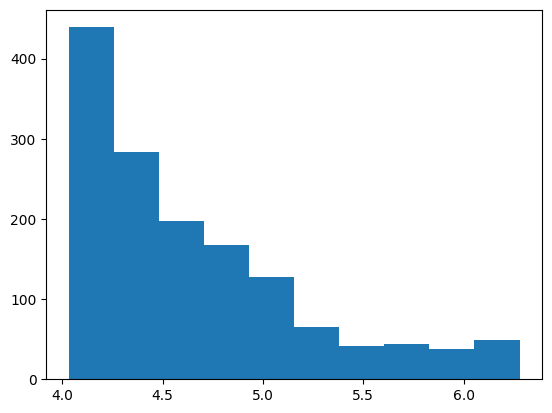

In [12]:
plt.hist(np.log10(final_flares["4-10 keV"]))